In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
os.listdir('/Users/alecclarkfeather/Downloads/patents_kaggle/')

['test.csv', 'train.csv', 'sample_submission.csv']

In [3]:
train_df = pd.read_csv('/Users/alecclarkfeather/Downloads/patents_kaggle/train.csv')
train_df.head(15)

,id,anchor,target,context,score
0,37d61fd2272659b1,abatement,abatement of pollution,A47,0.50
1,7b9652b17b68b7a4,abatement,act of abating,A47,0.75
2,36d72442aefd8232,abatement,active catalyst,A47,0.25
3,5296b0c19e1ce60e,abatement,eliminating process,A47,0.50
4,54c1e3b9184cb5b6,abatement,forest region,A47,0.00
5,067203128142739c,abatement,greenhouse gases,A47,0.25
6,061d17f04be2d1cf,abatement,increased rate,A47,0.25
7,e1f44e48399a2027,abatement,measurement level,A47,0.25
8,0a425937a3e86d10,abatement,minimising sounds,A47,0.50
9,ef2d4c2e6bbb208d,abatement,mixing core materials,A47,0.25


In [4]:
test_df = pd.read_csv('/Users/alecclarkfeather/Downloads/patents_kaggle/test.csv')
test_df.head(15)

,id,anchor,target,context
0,4112d61851461f60,opc drum,inorganic photoconductor drum,G02
1,09e418c93a776564,adjust gas flow,altering gas flow,F23
2,36baf228038e314b,lower trunnion,lower locating,B60
3,1f37ead645e7f0c8,cap component,upper portion,D06
4,71a5b6ad068d531f,neural stimulation,artificial neural network,H04
5,474c874d0c07bd21,dry corn,dry corn starch,C12
6,442c114ed5c4e3c9,tunneling capacitor,capacitor housing,G11
7,b8ae62ea5e1d8bdb,angular contact bearing,contact therapy radiation,B23
8,faaddaf8fcba8a3f,produce liquid hydrocarbons,produce a treated stream,C10
9,ae0262c02566d2ce,diesel fuel tank,diesel fuel tanks,F02


In [5]:
train_df.shape

(36473, 5)

In [6]:
test_df.shape

(36, 4)

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36473 entries, 0 to 36472
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       36473 non-null  object 
 1   anchor   36473 non-null  object 
 2   target   36473 non-null  object 
 3   context  36473 non-null  object 
 4   score    36473 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.4+ MB


In [9]:
train_df['anchor'].nunique()

733

In [10]:
train_df['context'].nunique()

106

In [11]:
train_df['score'].nunique()

5

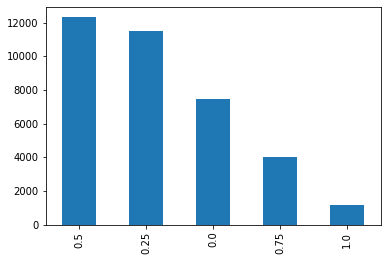

In [12]:
train_df['score'].value_counts().plot(kind='bar')
plt.show()

In [5]:
train_df['anchor_len'] = train_df['anchor'].str.split().apply(len)
train_df

,id,anchor,target,context,score,anchor_len
0,37d61fd2272659b1,abatement,abatement of pollution,A47,0.50,1
1,7b9652b17b68b7a4,abatement,act of abating,A47,0.75,1
2,36d72442aefd8232,abatement,active catalyst,A47,0.25,1
3,5296b0c19e1ce60e,abatement,eliminating process,A47,0.50,1
4,54c1e3b9184cb5b6,abatement,forest region,A47,0.00,1
...,...,...,...,...,...,...
36468,8e1386cbefd7f245,wood article,wooden article,B44,1.00,2
36469,42d9e032d1cd3242,wood article,wooden box,B44,0.50,2
36470,208654ccb9e14fa3,wood article,wooden handle,B44,0.50,2
36471,756ec035e694722b,wood article,wooden material,B44,0.75,2


In [6]:
train_df['target_len'] = train_df['target'].str.split().apply(len)
train_df

,id,anchor,target,context,score,anchor_len,target_len
0,37d61fd2272659b1,abatement,abatement of pollution,A47,0.50,1,3
1,7b9652b17b68b7a4,abatement,act of abating,A47,0.75,1,3
2,36d72442aefd8232,abatement,active catalyst,A47,0.25,1,2
3,5296b0c19e1ce60e,abatement,eliminating process,A47,0.50,1,2
4,54c1e3b9184cb5b6,abatement,forest region,A47,0.00,1,2
...,...,...,...,...,...,...,...
36468,8e1386cbefd7f245,wood article,wooden article,B44,1.00,2,2
36469,42d9e032d1cd3242,wood article,wooden box,B44,0.50,2,2
36470,208654ccb9e14fa3,wood article,wooden handle,B44,0.50,2,2
36471,756ec035e694722b,wood article,wooden material,B44,0.75,2,2


In [15]:
train_df['anchor_len'].describe()

count    36473.000000
mean         2.177885
std          0.641176
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          5.000000
Name: anchor_len, dtype: float64

In [16]:
train_df['target_len'].describe()

count    36473.000000
mean         2.171195
std          0.849613
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         15.000000
Name: target_len, dtype: float64

In [9]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from transformers import AutoTokenizer, AutoModel
import torch

In [8]:
tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/bert-base-nli-mean-tokens')
model = AutoModel.from_pretrained('sentence-transformers/bert-base-nli-mean-tokens')

In [19]:
train_sentence_pairings = train_df[['anchor', 'target']]
train_sentence_pairings

,anchor,target
0,abatement,abatement of pollution
1,abatement,act of abating
2,abatement,active catalyst
3,abatement,eliminating process
4,abatement,forest region
...,...,...
36468,wood article,wooden article
36469,wood article,wooden box
36470,wood article,wooden handle
36471,wood article,wooden material


In [20]:
sample_anchor = train_sentence_pairings.loc[0, 'anchor']
sample_target = train_sentence_pairings.loc[0, 'target']

In [21]:
sample_anchor

'abatement'

In [22]:
sample_target

'abatement of pollution'

In [23]:
anchor_tokens = tokenizer.encode_plus(sample_anchor, max_length=15, truncation=True,
                                     padding='max_length', return_tensors='pt')
anchor_tokens

{'input_ids': tensor([[  101, 19557, 18532,  4765,   102,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])}

In [24]:
target_tokens = tokenizer.encode_plus(sample_target, max_length=15, truncation=True,
                                     padding='max_length', return_tensors='pt')
target_tokens

{'input_ids': tensor([[  101, 19557, 18532,  4765,  1997, 10796,   102,     0,     0,     0,
             0,     0,     0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]])}

In [25]:
sample_output_anchor = model(anchor_tokens['input_ids'], anchor_tokens['attention_mask'])
sample_output_anchor.keys()

odict_keys(['last_hidden_state', 'pooler_output'])

In [26]:
sample_output_anchor['pooler_output'].shape

torch.Size([1, 768])

In [27]:
sample_output_anchor['last_hidden_state'].shape

torch.Size([1, 15, 768])

In [28]:
sample_output_target = model(target_tokens['input_ids'], target_tokens['attention_mask'])
sample_output_target.keys()

odict_keys(['last_hidden_state', 'pooler_output'])

In [29]:
anchor_embeddings = sample_output_anchor.last_hidden_state
target_embeddings = sample_output_target.last_hidden_state

In [30]:
anchor_embeddings.shape

torch.Size([1, 15, 768])

In [31]:
target_embeddings.shape

torch.Size([1, 15, 768])

In [32]:
anchor_attention_mask = anchor_tokens['attention_mask']
target_attention_mask = target_tokens['attention_mask']


In [33]:
anchor_attention_mask.shape

torch.Size([1, 15])

In [34]:
target_attention_mask.shape

torch.Size([1, 15])

In [35]:
anchor_attention_mask = anchor_attention_mask.unsqueeze(-1).expand(anchor_embeddings.size()).float()
target_attention_mask = target_attention_mask.unsqueeze(-1).expand(target_embeddings.size()).float()

In [36]:
anchor_attention_mask.shape

torch.Size([1, 15, 768])

In [37]:
target_attention_mask.shape

torch.Size([1, 15, 768])

In [38]:
masked_anchor_embeddings = anchor_embeddings * anchor_attention_mask
masked_target_embeddings = target_embeddings * target_attention_mask

In [39]:
masked_anchor_embeddings.shape

torch.Size([1, 15, 768])

In [40]:
masked_target_embeddings.shape

torch.Size([1, 15, 768])

In [41]:
summed_anchor = torch.sum(masked_anchor_embeddings, 1)
summed_target = torch.sum(masked_target_embeddings, 1)

In [42]:
summed_anchor_mask = torch.clamp(anchor_attention_mask.sum(1), min=1e-9)
summed_target_mask = torch.clamp(target_attention_mask.sum(1), min=1e-9)

In [43]:
anchor_mean_pooled = summed_anchor / summed_anchor_mask
target_mean_pooled = summed_target / summed_target_mask

In [44]:
anchor_mean_pooled.shape

torch.Size([1, 768])

In [45]:
target_mean_pooled.shape

torch.Size([1, 768])

In [46]:
anchor_mean_pooled_np = anchor_mean_pooled.detach().numpy()
target_mean_pooled_np = target_mean_pooled.detach().numpy()

In [47]:
cosine_similarity(anchor_mean_pooled_np, target_mean_pooled_np)[0][0]

0.8052439

In [48]:
def sim_calc(anchor, target):
    
    #anchor = train_sentence_pairings.loc[i, 'anchor']
    #target = train_sentence_pairings.loc[i, 'target']
    
    anchor_tokens = tokenizer.encode_plus(anchor, max_length=15, truncation=True,
                                     padding='max_length', return_tensors='pt')
    
    target_tokens = tokenizer.encode_plus(target, max_length=15, truncation=True,
                                     padding='max_length', return_tensors='pt')
    
    output_anchor = model(anchor_tokens['input_ids'], anchor_tokens['attention_mask'])
    
    output_target = model(target_tokens['input_ids'], target_tokens['attention_mask'])
    
    anchor_embeddings = output_anchor.last_hidden_state
    target_embeddings = output_target.last_hidden_state
    
    anchor_attention_mask = anchor_tokens['attention_mask']
    target_attention_mask = target_tokens['attention_mask']
    
    anchor_attention_mask = anchor_attention_mask.unsqueeze(-1).expand(anchor_embeddings.size()).float()
    target_attention_mask = target_attention_mask.unsqueeze(-1).expand(target_embeddings.size()).float()
    
    masked_anchor_embeddings = anchor_embeddings * anchor_attention_mask
    masked_target_embeddings = target_embeddings * target_attention_mask
    
    summed_anchor = torch.sum(masked_anchor_embeddings, 1)
    summed_target = torch.sum(masked_target_embeddings, 1)
    
    summed_anchor_mask = torch.clamp(anchor_attention_mask.sum(1), min=1e-9)
    summed_target_mask = torch.clamp(target_attention_mask.sum(1), min=1e-9)
    
    anchor_mean_pooled = summed_anchor / summed_anchor_mask
    target_mean_pooled = summed_target / summed_target_mask
    
    anchor_mean_pooled_np = anchor_mean_pooled.detach().numpy()
    target_mean_pooled_np = target_mean_pooled.detach().numpy()
    
    similarity = cosine_similarity(anchor_mean_pooled_np, target_mean_pooled_np)[0][0]
    
    #train_sentence_pairings.loc[i, 'similarity'] = similarity
    
    return similarity
    
    

In [50]:
train_sentence_pairings['similarity'] = train_sentence_pairings.apply(lambda x: sim_calc(x['anchor'], x['target']), axis=1)

train_sentence_pairings

<ipython-input-50-1d4b58daa0d2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_sentence_pairings['similarity'] = train_sentence_pairings.apply(lambda x: sim_calc(x['anchor'], x['target']), axis=1)


,anchor,target,similarity
0,abatement,abatement of pollution,0.805244
1,abatement,act of abating,0.912372
2,abatement,active catalyst,0.653080
3,abatement,eliminating process,0.795582
4,abatement,forest region,0.432009
...,...,...,...
36468,wood article,wooden article,0.811221
36469,wood article,wooden box,0.760114
36470,wood article,wooden handle,0.747953
36471,wood article,wooden material,0.762685


In [7]:
#train_sentence_pairings.to_csv('kernel_died.csv', index=False)

train_sentence_pairings = pd.read_csv('kernel_died.csv')
train_sentence_pairings

,anchor,target,similarity
0,abatement,abatement of pollution,0.805244
1,abatement,act of abating,0.912372
2,abatement,active catalyst,0.653080
3,abatement,eliminating process,0.795582
4,abatement,forest region,0.432009
...,...,...,...
36468,wood article,wooden article,0.811221
36469,wood article,wooden box,0.760114
36470,wood article,wooden handle,0.747953
36471,wood article,wooden material,0.762685


In [8]:
train_df_mod = pd.concat([train_sentence_pairings[['similarity']], 
                          train_df[['context', 'score', 'anchor_len', 'target_len']]], axis=1)
train_df_mod

,similarity,context,score,anchor_len,target_len
0,0.805244,A47,0.50,1,3
1,0.912372,A47,0.75,1,3
2,0.653080,A47,0.25,1,2
3,0.795582,A47,0.50,1,2
4,0.432009,A47,0.00,1,2
...,...,...,...,...,...
36468,0.811221,B44,1.00,2,2
36469,0.760114,B44,0.50,2,2
36470,0.747953,B44,0.50,2,2
36471,0.762685,B44,0.75,2,2


In [9]:
score_mapping = {0.00: 0, 0.25: 1, 0.50: 2, 0.75: 3, 1.00: 4}

train_df_mod['score_converted'] = train_df_mod['score'].map(score_mapping)

train_df_mod

,similarity,context,score,anchor_len,target_len,score_converted
0,0.805244,A47,0.50,1,3,2
1,0.912372,A47,0.75,1,3,3
2,0.653080,A47,0.25,1,2,1
3,0.795582,A47,0.50,1,2,2
4,0.432009,A47,0.00,1,2,0
...,...,...,...,...,...,...
36468,0.811221,B44,1.00,2,2,4
36469,0.760114,B44,0.50,2,2,2
36470,0.747953,B44,0.50,2,2,2
36471,0.762685,B44,0.75,2,2,3


In [10]:
train_df_final = pd.get_dummies(train_df_mod, columns=['context'], drop_first=True)
train_df_final

,similarity,score,anchor_len,target_len,score_converted,context_A21,context_A22,context_A23,context_A24,context_A41,...,context_G09,context_G10,context_G11,context_G16,context_G21,context_H01,context_H02,context_H03,context_H04,context_H05
0,0.805244,0.50,1,3,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.912372,0.75,1,3,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.653080,0.25,1,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.795582,0.50,1,2,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.432009,0.00,1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36468,0.811221,1.00,2,2,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36469,0.760114,0.50,2,2,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36470,0.747953,0.50,2,2,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36471,0.762685,0.75,2,2,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
X = train_df_final.drop(columns=['score', 'score_converted'], axis=1)
y1 = train_df_final['score_converted']
y2 = train_df_final['score']

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y1, stratify=y1, test_size=0.2)

In [13]:
#from xgboost import XGBClassifier
#import xgboost as xgb
from lightgbm import LGBMClassifier
#import lightgbm as lgb

In [14]:
#xgb_model1 = XGBClassifier()
lgbm_model1 = LGBMClassifier()

#xgb_model1.fit(X_train, y_train)
lgbm_model1.fit(X_train, y_train)

LGBMClassifier()

In [15]:
#xgb_preds = xgb_model1.predict(X_test)
lgbm_preds = lgbm_model1.predict(X_test)

In [16]:
from sklearn import metrics

#print(metrics.accuracy_score(y_test, xgb_preds))
print(metrics.accuracy_score(y_test, lgbm_preds))

0.5070596298834819


In [17]:
from xgboost import XGBClassifier

/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [18]:
xgb_model1 = XGBClassifier()

xgb_model1.fit(X_train, y_train)


/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[16:57:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [20]:
xgb_preds = xgb_model1.predict(X_test)

print(metrics.accuracy_score(y_test, xgb_preds))

0.5063742289239205


In [22]:
import optuna
import lightgbm as lgb

In [41]:
def objective(trial):
    
    #dtrain = lgb.Dataset(X_train, label=y_train)
    
    param = {
        "objective": "multiclass",
        "metric": "softmax",
        "num_class": 5,
        "verbosity": -1,
        "boosting_type": "gbdt",
        "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
    }
    
    gbm = LGBMClassifier(**param)
    
    gbm.fit(X_train, y_train)
    
    preds = gbm.predict(X_test)
    
    #pred_labels = np.rint(preds)
    
    accuracy = metrics.accuracy_score(y_test, preds)
    
    return accuracy

In [42]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)
trial = study.best_trial
print(trial)

[I 2023-02-01 17:15:08,807] A new study created in memory with name: no-name-a253ef07-5cd1-47ca-a17e-aac180f46b88


[LightGBM] [Warning] feature_fraction is set=0.8245951732372507, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8245951732372507
[LightGBM] [Warning] lambda_l1 is set=2.8529230137668207, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.8529230137668207
[LightGBM] [Warning] bagging_fraction is set=0.6413215962349789, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6413215962349789
[LightGBM] [Warning] lambda_l2 is set=0.004451457719065518, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.004451457719065518
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


[I 2023-02-01 17:15:11,038] Trial 0 finished with value: 0.5017135023989033 and parameters: {'lambda_l1': 2.8529230137668207, 'lambda_l2': 0.004451457719065518, 'num_leaves': 225, 'feature_fraction': 0.8245951732372507, 'bagging_fraction': 0.6413215962349789, 'bagging_freq': 6, 'min_child_samples': 70}. Best is trial 0 with value: 0.5017135023989033.


[LightGBM] [Warning] feature_fraction is set=0.8454445075380859, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8454445075380859
[LightGBM] [Warning] lambda_l1 is set=4.2984257779049e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.2984257779049e-05
[LightGBM] [Warning] bagging_fraction is set=0.8265979176113306, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8265979176113306
[LightGBM] [Warning] lambda_l2 is set=4.356374418670888e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.356374418670888e-07
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


[I 2023-02-01 17:15:15,267] Trial 1 finished with value: 0.4959561343385881 and parameters: {'lambda_l1': 4.2984257779049e-05, 'lambda_l2': 4.356374418670888e-07, 'num_leaves': 142, 'feature_fraction': 0.8454445075380859, 'bagging_fraction': 0.8265979176113306, 'bagging_freq': 4, 'min_child_samples': 86}. Best is trial 0 with value: 0.5017135023989033.


[LightGBM] [Warning] feature_fraction is set=0.6634143791724785, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6634143791724785
[LightGBM] [Warning] lambda_l1 is set=4.370967888287832e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.370967888287832e-05
[LightGBM] [Warning] bagging_fraction is set=0.58608668308876, subsample=1.0 will be ignored. Current value: bagging_fraction=0.58608668308876
[LightGBM] [Warning] lambda_l2 is set=5.983259744945898e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.983259744945898e-05
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


[I 2023-02-01 17:15:18,173] Trial 2 finished with value: 0.49485949280328995 and parameters: {'lambda_l1': 4.370967888287832e-05, 'lambda_l2': 5.983259744945898e-05, 'num_leaves': 94, 'feature_fraction': 0.6634143791724785, 'bagging_fraction': 0.58608668308876, 'bagging_freq': 7, 'min_child_samples': 68}. Best is trial 0 with value: 0.5017135023989033.


[LightGBM] [Warning] feature_fraction is set=0.5754289768620641, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5754289768620641
[LightGBM] [Warning] lambda_l1 is set=9.169445514633868e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.169445514633868e-06
[LightGBM] [Warning] bagging_fraction is set=0.5673565286255325, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5673565286255325
[LightGBM] [Warning] lambda_l2 is set=0.015228448442890563, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.015228448442890563
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


[I 2023-02-01 17:15:21,212] Trial 3 finished with value: 0.4976010966415353 and parameters: {'lambda_l1': 9.169445514633868e-06, 'lambda_l2': 0.015228448442890563, 'num_leaves': 121, 'feature_fraction': 0.5754289768620641, 'bagging_fraction': 0.5673565286255325, 'bagging_freq': 5, 'min_child_samples': 71}. Best is trial 0 with value: 0.5017135023989033.


[LightGBM] [Warning] feature_fraction is set=0.5153814806288765, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5153814806288765
[LightGBM] [Warning] lambda_l1 is set=0.0004605191653358321, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0004605191653358321
[LightGBM] [Warning] bagging_fraction is set=0.6333540800755486, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6333540800755486
[LightGBM] [Warning] lambda_l2 is set=1.5662986043339122, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.5662986043339122
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


[I 2023-02-01 17:15:25,005] Trial 4 finished with value: 0.49431117203564084 and parameters: {'lambda_l1': 0.0004605191653358321, 'lambda_l2': 1.5662986043339122, 'num_leaves': 256, 'feature_fraction': 0.5153814806288765, 'bagging_fraction': 0.6333540800755486, 'bagging_freq': 6, 'min_child_samples': 32}. Best is trial 0 with value: 0.5017135023989033.


[LightGBM] [Warning] feature_fraction is set=0.6112049384421538, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6112049384421538
[LightGBM] [Warning] lambda_l1 is set=3.530511690841754e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.530511690841754e-07
[LightGBM] [Warning] bagging_fraction is set=0.8950699094041932, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8950699094041932
[LightGBM] [Warning] lambda_l2 is set=2.7177832471022527, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.7177832471022527
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2023-02-01 17:15:27,844] Trial 5 finished with value: 0.5058259081562714 and parameters: {'lambda_l1': 3.530511690841754e-07, 'lambda_l2': 2.7177832471022527, 'num_leaves': 71, 'feature_fraction': 0.6112049384421538, 'bagging_fraction': 0.8950699094041932, 'bagging_freq': 3, 'min_child_samples': 8}. Best is trial 5 with value: 0.5058259081562714.


[LightGBM] [Warning] feature_fraction is set=0.49606516759833746, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.49606516759833746
[LightGBM] [Warning] lambda_l1 is set=5.9298804518087987e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.9298804518087987e-05
[LightGBM] [Warning] bagging_fraction is set=0.9950079213870419, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9950079213870419
[LightGBM] [Warning] lambda_l2 is set=0.0016557241370576494, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0016557241370576494
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


[I 2023-02-01 17:15:31,171] Trial 6 finished with value: 0.5000685400959561 and parameters: {'lambda_l1': 5.9298804518087987e-05, 'lambda_l2': 0.0016557241370576494, 'num_leaves': 143, 'feature_fraction': 0.49606516759833746, 'bagging_fraction': 0.9950079213870419, 'bagging_freq': 5, 'min_child_samples': 93}. Best is trial 5 with value: 0.5058259081562714.


[LightGBM] [Warning] feature_fraction is set=0.8338982805767352, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8338982805767352
[LightGBM] [Warning] lambda_l1 is set=0.017833524883538333, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.017833524883538333
[LightGBM] [Warning] bagging_fraction is set=0.9031336229521943, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9031336229521943
[LightGBM] [Warning] lambda_l2 is set=3.219588677065916e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.219588677065916e-08
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


[I 2023-02-01 17:15:34,861] Trial 7 finished with value: 0.49554489376285127 and parameters: {'lambda_l1': 0.017833524883538333, 'lambda_l2': 3.219588677065916e-08, 'num_leaves': 169, 'feature_fraction': 0.8338982805767352, 'bagging_fraction': 0.9031336229521943, 'bagging_freq': 5, 'min_child_samples': 88}. Best is trial 5 with value: 0.5058259081562714.


[LightGBM] [Warning] feature_fraction is set=0.41286160638310393, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.41286160638310393
[LightGBM] [Warning] lambda_l1 is set=0.13009214846996112, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.13009214846996112
[LightGBM] [Warning] bagging_fraction is set=0.6150553299177586, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6150553299177586
[LightGBM] [Warning] lambda_l2 is set=6.110099322033585e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.110099322033585e-05
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


[I 2023-02-01 17:15:37,112] Trial 8 finished with value: 0.500479780671693 and parameters: {'lambda_l1': 0.13009214846996112, 'lambda_l2': 6.110099322033585e-05, 'num_leaves': 149, 'feature_fraction': 0.41286160638310393, 'bagging_fraction': 0.6150553299177586, 'bagging_freq': 7, 'min_child_samples': 63}. Best is trial 5 with value: 0.5058259081562714.


[LightGBM] [Warning] feature_fraction is set=0.9341321764810433, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9341321764810433
[LightGBM] [Warning] lambda_l1 is set=0.24013291761804495, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.24013291761804495
[LightGBM] [Warning] bagging_fraction is set=0.5494394281833652, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5494394281833652
[LightGBM] [Warning] lambda_l2 is set=5.887959349125933e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.887959349125933e-07
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2023-02-01 17:15:39,081] Trial 9 finished with value: 0.49650445510623714 and parameters: {'lambda_l1': 0.24013291761804495, 'lambda_l2': 5.887959349125933e-07, 'num_leaves': 78, 'feature_fraction': 0.9341321764810433, 'bagging_fraction': 0.5494394281833652, 'bagging_freq': 1, 'min_child_samples': 18}. Best is trial 5 with value: 0.5058259081562714.


[LightGBM] [Warning] feature_fraction is set=0.6732594029024838, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6732594029024838
[LightGBM] [Warning] lambda_l1 is set=3.2073996598304527e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.2073996598304527e-08
[LightGBM] [Warning] bagging_fraction is set=0.7765789308179152, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7765789308179152
[LightGBM] [Warning] lambda_l2 is set=8.004511957854437, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.004511957854437
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2023-02-01 17:15:39,700] Trial 10 finished with value: 0.4901987662782728 and parameters: {'lambda_l1': 3.2073996598304527e-08, 'lambda_l2': 8.004511957854437, 'num_leaves': 4, 'feature_fraction': 0.6732594029024838, 'bagging_fraction': 0.7765789308179152, 'bagging_freq': 2, 'min_child_samples': 5}. Best is trial 5 with value: 0.5058259081562714.


[LightGBM] [Warning] feature_fraction is set=0.75719146148267, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.75719146148267
[LightGBM] [Warning] lambda_l1 is set=5.363590750246367, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.363590750246367
[LightGBM] [Warning] bagging_fraction is set=0.7180360263585133, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7180360263585133
[LightGBM] [Warning] lambda_l2 is set=0.1835971944878024, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1835971944878024
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2023-02-01 17:15:41,441] Trial 11 finished with value: 0.5043180260452365 and parameters: {'lambda_l1': 5.363590750246367, 'lambda_l2': 0.1835971944878024, 'num_leaves': 241, 'feature_fraction': 0.75719146148267, 'bagging_fraction': 0.7180360263585133, 'bagging_freq': 3, 'min_child_samples': 43}. Best is trial 5 with value: 0.5058259081562714.


[LightGBM] [Warning] feature_fraction is set=0.7293691215103003, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7293691215103003
[LightGBM] [Warning] lambda_l1 is set=4.570503214636184, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.570503214636184
[LightGBM] [Warning] bagging_fraction is set=0.4493002392184403, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4493002392184403
[LightGBM] [Warning] lambda_l2 is set=0.12561749757295956, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.12561749757295956
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2023-02-01 17:15:42,788] Trial 12 finished with value: 0.5062371487320082 and parameters: {'lambda_l1': 4.570503214636184, 'lambda_l2': 0.12561749757295956, 'num_leaves': 30, 'feature_fraction': 0.7293691215103003, 'bagging_fraction': 0.4493002392184403, 'bagging_freq': 3, 'min_child_samples': 40}. Best is trial 12 with value: 0.5062371487320082.


[LightGBM] [Warning] feature_fraction is set=0.6307361642215272, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6307361642215272
[LightGBM] [Warning] lambda_l1 is set=2.7446611996621027e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.7446611996621027e-07
[LightGBM] [Warning] bagging_fraction is set=0.4551272503438308, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4551272503438308
[LightGBM] [Warning] lambda_l2 is set=0.5610498485290677, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5610498485290677
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2023-02-01 17:15:44,335] Trial 13 finished with value: 0.5056888279643591 and parameters: {'lambda_l1': 2.7446611996621027e-07, 'lambda_l2': 0.5610498485290677, 'num_leaves': 26, 'feature_fraction': 0.6307361642215272, 'bagging_fraction': 0.4551272503438308, 'bagging_freq': 3, 'min_child_samples': 29}. Best is trial 12 with value: 0.5062371487320082.


[LightGBM] [Warning] feature_fraction is set=0.7490242551884421, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7490242551884421
[LightGBM] [Warning] lambda_l1 is set=0.0011926142416983786, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0011926142416983786
[LightGBM] [Warning] bagging_fraction is set=0.42623462115152566, subsample=1.0 will be ignored. Current value: bagging_fraction=0.42623462115152566
[LightGBM] [Warning] lambda_l2 is set=0.12801570143934426, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.12801570143934426
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2023-02-01 17:15:46,524] Trial 14 finished with value: 0.49568197395476354 and parameters: {'lambda_l1': 0.0011926142416983786, 'lambda_l2': 0.12801570143934426, 'num_leaves': 61, 'feature_fraction': 0.7490242551884421, 'bagging_fraction': 0.42623462115152566, 'bagging_freq': 3, 'min_child_samples': 48}. Best is trial 12 with value: 0.5062371487320082.


[LightGBM] [Warning] feature_fraction is set=0.595778800931154, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.595778800931154
[LightGBM] [Warning] lambda_l1 is set=6.108209074782724e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.108209074782724e-07
[LightGBM] [Warning] bagging_fraction is set=0.40169144779824445, subsample=1.0 will be ignored. Current value: bagging_fraction=0.40169144779824445
[LightGBM] [Warning] lambda_l2 is set=5.903318193622589, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.903318193622589
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2023-02-01 17:15:48,300] Trial 15 finished with value: 0.5000685400959561 and parameters: {'lambda_l1': 6.108209074782724e-07, 'lambda_l2': 5.903318193622589, 'num_leaves': 39, 'feature_fraction': 0.595778800931154, 'bagging_fraction': 0.40169144779824445, 'bagging_freq': 1, 'min_child_samples': 7}. Best is trial 12 with value: 0.5062371487320082.


[LightGBM] [Warning] feature_fraction is set=0.713278047553408, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.713278047553408
[LightGBM] [Warning] lambda_l1 is set=0.004019886321829267, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.004019886321829267
[LightGBM] [Warning] bagging_fraction is set=0.4949918755067086, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4949918755067086
[LightGBM] [Warning] lambda_l2 is set=0.06784080307711371, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.06784080307711371
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2023-02-01 17:15:50,465] Trial 16 finished with value: 0.5011651816312542 and parameters: {'lambda_l1': 0.004019886321829267, 'lambda_l2': 0.06784080307711371, 'num_leaves': 51, 'feature_fraction': 0.713278047553408, 'bagging_fraction': 0.4949918755067086, 'bagging_freq': 2, 'min_child_samples': 24}. Best is trial 12 with value: 0.5062371487320082.


[LightGBM] [Warning] feature_fraction is set=0.7009047648321044, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7009047648321044
[LightGBM] [Warning] lambda_l1 is set=2.1254203528070184e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.1254203528070184e-06
[LightGBM] [Warning] bagging_fraction is set=0.7253053642201248, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7253053642201248
[LightGBM] [Warning] lambda_l2 is set=1.1115483126946712, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.1115483126946712
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


[I 2023-02-01 17:15:53,544] Trial 17 finished with value: 0.4988348183687457 and parameters: {'lambda_l1': 2.1254203528070184e-06, 'lambda_l2': 1.1115483126946712, 'num_leaves': 100, 'feature_fraction': 0.7009047648321044, 'bagging_fraction': 0.7253053642201248, 'bagging_freq': 4, 'min_child_samples': 41}. Best is trial 12 with value: 0.5062371487320082.


[LightGBM] [Warning] feature_fraction is set=0.9741671516529375, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9741671516529375
[LightGBM] [Warning] lambda_l1 is set=3.3805369063164755e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.3805369063164755e-08
[LightGBM] [Warning] bagging_fraction is set=0.5054995335793327, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5054995335793327
[LightGBM] [Warning] lambda_l2 is set=0.030776103776559992, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.030776103776559992
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2023-02-01 17:15:54,395] Trial 18 finished with value: 0.5065113091158328 and parameters: {'lambda_l1': 3.3805369063164755e-08, 'lambda_l2': 0.030776103776559992, 'num_leaves': 10, 'feature_fraction': 0.9741671516529375, 'bagging_fraction': 0.5054995335793327, 'bagging_freq': 2, 'min_child_samples': 14}. Best is trial 18 with value: 0.5065113091158328.


[LightGBM] [Warning] feature_fraction is set=0.9869035265396594, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9869035265396594
[LightGBM] [Warning] lambda_l1 is set=2.5577796867816747e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.5577796867816747e-08
[LightGBM] [Warning] bagging_fraction is set=0.5015456533467323, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5015456533467323
[LightGBM] [Warning] lambda_l2 is set=0.03115145543812197, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.03115145543812197
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2023-02-01 17:15:55,296] Trial 19 finished with value: 0.507607950651131 and parameters: {'lambda_l1': 2.5577796867816747e-08, 'lambda_l2': 0.03115145543812197, 'num_leaves': 11, 'feature_fraction': 0.9869035265396594, 'bagging_fraction': 0.5015456533467323, 'bagging_freq': 2, 'min_child_samples': 59}. Best is trial 19 with value: 0.507607950651131.


[LightGBM] [Warning] feature_fraction is set=0.9737737685541448, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9737737685541448
[LightGBM] [Warning] lambda_l1 is set=1.0155415977557064e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0155415977557064e-08
[LightGBM] [Warning] bagging_fraction is set=0.519011746557195, subsample=1.0 will be ignored. Current value: bagging_fraction=0.519011746557195
[LightGBM] [Warning] lambda_l2 is set=0.01293806407081325, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01293806407081325
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2023-02-01 17:15:55,752] Trial 20 finished with value: 0.48498971898560655 and parameters: {'lambda_l1': 1.0155415977557064e-08, 'lambda_l2': 0.01293806407081325, 'num_leaves': 2, 'feature_fraction': 0.9737737685541448, 'bagging_fraction': 0.519011746557195, 'bagging_freq': 2, 'min_child_samples': 57}. Best is trial 19 with value: 0.507607950651131.


[LightGBM] [Warning] feature_fraction is set=0.9859768872003353, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9859768872003353
[LightGBM] [Warning] lambda_l1 is set=5.626958237361852e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.626958237361852e-08
[LightGBM] [Warning] bagging_fraction is set=0.4845137632122444, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4845137632122444
[LightGBM] [Warning] lambda_l2 is set=0.045842857616471944, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.045842857616471944
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2023-02-01 17:15:57,230] Trial 21 finished with value: 0.5058259081562714 and parameters: {'lambda_l1': 5.626958237361852e-08, 'lambda_l2': 0.045842857616471944, 'num_leaves': 25, 'feature_fraction': 0.9859768872003353, 'bagging_fraction': 0.4845137632122444, 'bagging_freq': 2, 'min_child_samples': 35}. Best is trial 19 with value: 0.507607950651131.


[LightGBM] [Warning] feature_fraction is set=0.9178021990325391, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9178021990325391
[LightGBM] [Warning] lambda_l1 is set=3.217445649576491e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.217445649576491e-06
[LightGBM] [Warning] bagging_fraction is set=0.4616360278545266, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4616360278545266
[LightGBM] [Warning] lambda_l2 is set=0.0005566130478980802, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0005566130478980802
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2023-02-01 17:15:58,603] Trial 22 finished with value: 0.5052775873886224 and parameters: {'lambda_l1': 3.217445649576491e-06, 'lambda_l2': 0.0005566130478980802, 'num_leaves': 23, 'feature_fraction': 0.9178021990325391, 'bagging_fraction': 0.4616360278545266, 'bagging_freq': 1, 'min_child_samples': 53}. Best is trial 19 with value: 0.507607950651131.


[LightGBM] [Warning] feature_fraction is set=0.9963289708648431, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9963289708648431
[LightGBM] [Warning] lambda_l1 is set=1.0574846075437329e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0574846075437329e-07
[LightGBM] [Warning] bagging_fraction is set=0.5243344669907535, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5243344669907535
[LightGBM] [Warning] lambda_l2 is set=0.3491315666470322, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3491315666470322
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


[I 2023-02-01 17:15:59,069] Trial 23 finished with value: 0.4810143934201508 and parameters: {'lambda_l1': 1.0574846075437329e-07, 'lambda_l2': 0.3491315666470322, 'num_leaves': 2, 'feature_fraction': 0.9963289708648431, 'bagging_fraction': 0.5243344669907535, 'bagging_freq': 4, 'min_child_samples': 16}. Best is trial 19 with value: 0.507607950651131.


[LightGBM] [Warning] feature_fraction is set=0.9014846672479004, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9014846672479004
[LightGBM] [Warning] lambda_l1 is set=1.0455094460213893e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0455094460213893e-08
[LightGBM] [Warning] bagging_fraction is set=0.4093040452445219, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4093040452445219
[LightGBM] [Warning] lambda_l2 is set=0.023540834105468592, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.023540834105468592
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2023-02-01 17:16:00,926] Trial 24 finished with value: 0.49856065798492116 and parameters: {'lambda_l1': 1.0455094460213893e-08, 'lambda_l2': 0.023540834105468592, 'num_leaves': 45, 'feature_fraction': 0.9014846672479004, 'bagging_fraction': 0.4093040452445219, 'bagging_freq': 2, 'min_child_samples': 59}. Best is trial 19 with value: 0.507607950651131.


[LightGBM] [Warning] feature_fraction is set=0.8746510208694664, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8746510208694664
[LightGBM] [Warning] lambda_l1 is set=1.1268085222372891e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1268085222372891e-07
[LightGBM] [Warning] bagging_fraction is set=0.4663123132693122, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4663123132693122
[LightGBM] [Warning] lambda_l2 is set=0.2947237844982505, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2947237844982505
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2023-02-01 17:16:04,548] Trial 25 finished with value: 0.4884167237834133 and parameters: {'lambda_l1': 1.1268085222372891e-07, 'lambda_l2': 0.2947237844982505, 'num_leaves': 185, 'feature_fraction': 0.8746510208694664, 'bagging_fraction': 0.4663123132693122, 'bagging_freq': 3, 'min_child_samples': 39}. Best is trial 19 with value: 0.507607950651131.


[LightGBM] [Warning] feature_fraction is set=0.9461801147219353, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9461801147219353
[LightGBM] [Warning] lambda_l1 is set=1.1961570567522654e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1961570567522654e-06
[LightGBM] [Warning] bagging_fraction is set=0.5246783522293351, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5246783522293351
[LightGBM] [Warning] lambda_l2 is set=0.0041784546510256594, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0041784546510256594
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2023-02-01 17:16:05,824] Trial 26 finished with value: 0.5003427004797807 and parameters: {'lambda_l1': 1.1961570567522654e-06, 'lambda_l2': 0.0041784546510256594, 'num_leaves': 31, 'feature_fraction': 0.9461801147219353, 'bagging_fraction': 0.5246783522293351, 'bagging_freq': 1, 'min_child_samples': 80}. Best is trial 19 with value: 0.507607950651131.


[LightGBM] [Warning] feature_fraction is set=0.8891956323331335, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8891956323331335
[LightGBM] [Warning] lambda_l1 is set=8.065323422811595e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.065323422811595e-06
[LightGBM] [Warning] bagging_fraction is set=0.5844037020703671, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5844037020703671
[LightGBM] [Warning] lambda_l2 is set=0.060897748252449486, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.060897748252449486
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2023-02-01 17:16:08,517] Trial 27 finished with value: 0.49773817683344757 and parameters: {'lambda_l1': 8.065323422811595e-06, 'lambda_l2': 0.060897748252449486, 'num_leaves': 85, 'feature_fraction': 0.8891956323331335, 'bagging_fraction': 0.5844037020703671, 'bagging_freq': 2, 'min_child_samples': 24}. Best is trial 19 with value: 0.507607950651131.


[LightGBM] [Warning] feature_fraction is set=0.9568678592258716, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9568678592258716
[LightGBM] [Warning] lambda_l1 is set=4.829209522052479e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.829209522052479e-07
[LightGBM] [Warning] bagging_fraction is set=0.44318803234389414, subsample=1.0 will be ignored. Current value: bagging_fraction=0.44318803234389414
[LightGBM] [Warning] lambda_l2 is set=0.8216722644452498, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.8216722644452498
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


[I 2023-02-01 17:16:11,368] Trial 28 finished with value: 0.4937628512679918 and parameters: {'lambda_l1': 4.829209522052479e-07, 'lambda_l2': 0.8216722644452498, 'num_leaves': 112, 'feature_fraction': 0.9568678592258716, 'bagging_fraction': 0.44318803234389414, 'bagging_freq': 4, 'min_child_samples': 49}. Best is trial 19 with value: 0.507607950651131.


[LightGBM] [Warning] feature_fraction is set=0.8102954319269232, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8102954319269232
[LightGBM] [Warning] lambda_l1 is set=2.5864733740656374, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.5864733740656374
[LightGBM] [Warning] bagging_fraction is set=0.6446135555760086, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6446135555760086
[LightGBM] [Warning] lambda_l2 is set=0.006479783304006462, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.006479783304006462
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2023-02-01 17:16:13,584] Trial 29 finished with value: 0.5055517477724469 and parameters: {'lambda_l1': 2.5864733740656374, 'lambda_l2': 0.006479783304006462, 'num_leaves': 60, 'feature_fraction': 0.8102954319269232, 'bagging_fraction': 0.6446135555760086, 'bagging_freq': 3, 'min_child_samples': 15}. Best is trial 19 with value: 0.507607950651131.


[LightGBM] [Warning] feature_fraction is set=0.7981215558121928, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7981215558121928
[LightGBM] [Warning] lambda_l1 is set=0.00014786080020120644, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00014786080020120644
[LightGBM] [Warning] bagging_fraction is set=0.500278161381437, subsample=1.0 will be ignored. Current value: bagging_fraction=0.500278161381437
[LightGBM] [Warning] lambda_l2 is set=0.03408280028444716, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.03408280028444716
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2023-02-01 17:16:16,060] Trial 30 finished with value: 0.49828649760109667 and parameters: {'lambda_l1': 0.00014786080020120644, 'lambda_l2': 0.03408280028444716, 'num_leaves': 210, 'feature_fraction': 0.7981215558121928, 'bagging_fraction': 0.500278161381437, 'bagging_freq': 1, 'min_child_samples': 70}. Best is trial 19 with value: 0.507607950651131.


[LightGBM] [Warning] feature_fraction is set=0.9979001662126564, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9979001662126564
[LightGBM] [Warning] lambda_l1 is set=2.2478016864180256e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.2478016864180256e-07
[LightGBM] [Warning] bagging_fraction is set=0.6705565419631845, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6705565419631845
[LightGBM] [Warning] lambda_l2 is set=2.373143549705576, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.373143549705576
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2023-02-01 17:16:17,370] Trial 31 finished with value: 0.5008910212474298 and parameters: {'lambda_l1': 2.2478016864180256e-07, 'lambda_l2': 2.373143549705576, 'num_leaves': 21, 'feature_fraction': 0.9979001662126564, 'bagging_fraction': 0.6705565419631845, 'bagging_freq': 3, 'min_child_samples': 10}. Best is trial 19 with value: 0.507607950651131.


[LightGBM] [Warning] feature_fraction is set=0.8869880990814423, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8869880990814423
[LightGBM] [Warning] lambda_l1 is set=3.915738753433581e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.915738753433581e-08
[LightGBM] [Warning] bagging_fraction is set=0.5450638376037559, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5450638376037559
[LightGBM] [Warning] lambda_l2 is set=9.284842254764591, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.284842254764591
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2023-02-01 17:16:19,662] Trial 32 finished with value: 0.4996572995202193 and parameters: {'lambda_l1': 3.915738753433581e-08, 'lambda_l2': 9.284842254764591, 'num_leaves': 66, 'feature_fraction': 0.8869880990814423, 'bagging_fraction': 0.5450638376037559, 'bagging_freq': 2, 'min_child_samples': 22}. Best is trial 19 with value: 0.507607950651131.


[LightGBM] [Warning] feature_fraction is set=0.8555903508070889, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8555903508070889
[LightGBM] [Warning] lambda_l1 is set=3.279025753119076e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.279025753119076e-07
[LightGBM] [Warning] bagging_fraction is set=0.5973473381685762, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5973473381685762
[LightGBM] [Warning] lambda_l2 is set=0.2695960386689185, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2695960386689185
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


[I 2023-02-01 17:16:20,729] Trial 33 finished with value: 0.5051405071967101 and parameters: {'lambda_l1': 3.279025753119076e-07, 'lambda_l2': 0.2695960386689185, 'num_leaves': 15, 'feature_fraction': 0.8555903508070889, 'bagging_fraction': 0.5973473381685762, 'bagging_freq': 4, 'min_child_samples': 11}. Best is trial 19 with value: 0.507607950651131.


[LightGBM] [Warning] feature_fraction is set=0.926013149870943, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.926013149870943
[LightGBM] [Warning] lambda_l1 is set=1.8430730542629535e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8430730542629535e-05
[LightGBM] [Warning] bagging_fraction is set=0.5540829125928421, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5540829125928421
[LightGBM] [Warning] lambda_l2 is set=0.07935657028469151, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.07935657028469151
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2023-02-01 17:16:22,614] Trial 34 finished with value: 0.5010281014393421 and parameters: {'lambda_l1': 1.8430730542629535e-05, 'lambda_l2': 0.07935657028469151, 'num_leaves': 43, 'feature_fraction': 0.926013149870943, 'bagging_fraction': 0.5540829125928421, 'bagging_freq': 3, 'min_child_samples': 80}. Best is trial 19 with value: 0.507607950651131.


[LightGBM] [Warning] feature_fraction is set=0.95506167641678, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.95506167641678
[LightGBM] [Warning] lambda_l1 is set=9.221057056658175e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.221057056658175e-07
[LightGBM] [Warning] bagging_fraction is set=0.4426194304986032, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4426194304986032
[LightGBM] [Warning] lambda_l2 is set=2.125725155655764, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.125725155655764
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2023-02-01 17:16:25,016] Trial 35 finished with value: 0.5002056202878684 and parameters: {'lambda_l1': 9.221057056658175e-07, 'lambda_l2': 2.125725155655764, 'num_leaves': 69, 'feature_fraction': 0.95506167641678, 'bagging_fraction': 0.4426194304986032, 'bagging_freq': 2, 'min_child_samples': 20}. Best is trial 19 with value: 0.507607950651131.


[LightGBM] [Warning] feature_fraction is set=0.8546319755687095, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8546319755687095
[LightGBM] [Warning] lambda_l1 is set=2.6623719453811504e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.6623719453811504e-08
[LightGBM] [Warning] bagging_fraction is set=0.4846203825046309, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4846203825046309
[LightGBM] [Warning] lambda_l2 is set=0.011654463141434205, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.011654463141434205
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


[I 2023-02-01 17:16:26,038] Trial 36 finished with value: 0.5019876627827279 and parameters: {'lambda_l1': 2.6623719453811504e-08, 'lambda_l2': 0.011654463141434205, 'num_leaves': 13, 'feature_fraction': 0.8546319755687095, 'bagging_fraction': 0.4846203825046309, 'bagging_freq': 4, 'min_child_samples': 29}. Best is trial 19 with value: 0.507607950651131.


[LightGBM] [Warning] feature_fraction is set=0.785016881985946, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.785016881985946
[LightGBM] [Warning] lambda_l1 is set=5.412614281999591e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.412614281999591e-06
[LightGBM] [Warning] bagging_fraction is set=0.5723580112667729, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5723580112667729
[LightGBM] [Warning] lambda_l2 is set=0.0022697453161289695, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0022697453161289695
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2023-02-01 17:16:27,912] Trial 37 finished with value: 0.500479780671693 and parameters: {'lambda_l1': 5.412614281999591e-06, 'lambda_l2': 0.0022697453161289695, 'num_leaves': 38, 'feature_fraction': 0.785016881985946, 'bagging_fraction': 0.5723580112667729, 'bagging_freq': 3, 'min_child_samples': 65}. Best is trial 19 with value: 0.507607950651131.


[LightGBM] [Warning] feature_fraction is set=0.8372814076794718, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8372814076794718
[LightGBM] [Warning] lambda_l1 is set=2.6858612162386384e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.6858612162386384e-05
[LightGBM] [Warning] bagging_fraction is set=0.4007229896104833, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4007229896104833
[LightGBM] [Warning] lambda_l2 is set=0.6911844301693545, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6911844301693545
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2023-02-01 17:16:30,198] Trial 38 finished with value: 0.4966415352981494 and parameters: {'lambda_l1': 2.6858612162386384e-05, 'lambda_l2': 0.6911844301693545, 'num_leaves': 93, 'feature_fraction': 0.8372814076794718, 'bagging_fraction': 0.4007229896104833, 'bagging_freq': 2, 'min_child_samples': 76}. Best is trial 19 with value: 0.507607950651131.


[LightGBM] [Warning] feature_fraction is set=0.6470612451419966, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6470612451419966
[LightGBM] [Warning] lambda_l1 is set=2.1646658180639553e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.1646658180639553e-06
[LightGBM] [Warning] bagging_fraction is set=0.8270822708696053, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8270822708696053
[LightGBM] [Warning] lambda_l2 is set=0.02131192822190315, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.02131192822190315
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


[I 2023-02-01 17:16:32,791] Trial 39 finished with value: 0.4993831391363948 and parameters: {'lambda_l1': 2.1646658180639553e-06, 'lambda_l2': 0.02131192822190315, 'num_leaves': 77, 'feature_fraction': 0.6470612451419966, 'bagging_fraction': 0.8270822708696053, 'bagging_freq': 5, 'min_child_samples': 12}. Best is trial 19 with value: 0.507607950651131.


[LightGBM] [Warning] feature_fraction is set=0.9105583169065348, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9105583169065348
[LightGBM] [Warning] lambda_l1 is set=1.220017388473313e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.220017388473313e-07
[LightGBM] [Warning] bagging_fraction is set=0.615589637091221, subsample=1.0 will be ignored. Current value: bagging_fraction=0.615589637091221
[LightGBM] [Warning] lambda_l2 is set=2.7329392327318587, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.7329392327318587
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2023-02-01 17:16:33,898] Trial 40 finished with value: 0.5023989033584647 and parameters: {'lambda_l1': 1.220017388473313e-07, 'lambda_l2': 2.7329392327318587, 'num_leaves': 14, 'feature_fraction': 0.9105583169065348, 'bagging_fraction': 0.615589637091221, 'bagging_freq': 3, 'min_child_samples': 98}. Best is trial 19 with value: 0.507607950651131.


[LightGBM] [Warning] feature_fraction is set=0.969851375994353, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.969851375994353
[LightGBM] [Warning] lambda_l1 is set=8.80690729323384e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.80690729323384e-08
[LightGBM] [Warning] bagging_fraction is set=0.48858314041849915, subsample=1.0 will be ignored. Current value: bagging_fraction=0.48858314041849915
[LightGBM] [Warning] lambda_l2 is set=0.11166941930020537, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.11166941930020537
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2023-02-01 17:16:35,490] Trial 41 finished with value: 0.5030843043180261 and parameters: {'lambda_l1': 8.80690729323384e-08, 'lambda_l2': 0.11166941930020537, 'num_leaves': 32, 'feature_fraction': 0.969851375994353, 'bagging_fraction': 0.48858314041849915, 'bagging_freq': 2, 'min_child_samples': 30}. Best is trial 19 with value: 0.507607950651131.


[LightGBM] [Warning] feature_fraction is set=0.9925726076545265, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9925726076545265
[LightGBM] [Warning] lambda_l1 is set=3.897778079194462e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.897778079194462e-08
[LightGBM] [Warning] bagging_fraction is set=0.4670847583543355, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4670847583543355
[LightGBM] [Warning] lambda_l2 is set=0.03233853318686194, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.03233853318686194
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2023-02-01 17:16:37,606] Trial 42 finished with value: 0.4996572995202193 and parameters: {'lambda_l1': 3.897778079194462e-08, 'lambda_l2': 0.03233853318686194, 'num_leaves': 54, 'feature_fraction': 0.9925726076545265, 'bagging_fraction': 0.4670847583543355, 'bagging_freq': 2, 'min_child_samples': 36}. Best is trial 19 with value: 0.507607950651131.


[LightGBM] [Warning] feature_fraction is set=0.936663491414133, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.936663491414133
[LightGBM] [Warning] lambda_l1 is set=0.00010527207411919046, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00010527207411919046
[LightGBM] [Warning] bagging_fraction is set=0.5108856070754182, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5108856070754182
[LightGBM] [Warning] lambda_l2 is set=0.19853289317760175, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.19853289317760175
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2023-02-01 17:16:38,757] Trial 43 finished with value: 0.5048663468128856 and parameters: {'lambda_l1': 0.00010527207411919046, 'lambda_l2': 0.19853289317760175, 'num_leaves': 24, 'feature_fraction': 0.936663491414133, 'bagging_fraction': 0.5108856070754182, 'bagging_freq': 1, 'min_child_samples': 45}. Best is trial 19 with value: 0.507607950651131.


[LightGBM] [Warning] feature_fraction is set=0.9672544701502367, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9672544701502367
[LightGBM] [Warning] lambda_l1 is set=1.7113685677822448e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.7113685677822448e-08
[LightGBM] [Warning] bagging_fraction is set=0.42830752408069506, subsample=1.0 will be ignored. Current value: bagging_fraction=0.42830752408069506
[LightGBM] [Warning] lambda_l2 is set=0.008812218716088985, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.008812218716088985
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


[I 2023-02-01 17:16:40,719] Trial 44 finished with value: 0.49485949280328995 and parameters: {'lambda_l1': 1.7113685677822448e-08, 'lambda_l2': 0.008812218716088985, 'num_leaves': 49, 'feature_fraction': 0.9672544701502367, 'bagging_fraction': 0.42830752408069506, 'bagging_freq': 6, 'min_child_samples': 35}. Best is trial 19 with value: 0.507607950651131.


[LightGBM] [Warning] feature_fraction is set=0.5574901507408412, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5574901507408412
[LightGBM] [Warning] lambda_l1 is set=3.982962278542628e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.982962278542628e-08
[LightGBM] [Warning] bagging_fraction is set=0.5377025661667274, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5377025661667274
[LightGBM] [Warning] lambda_l2 is set=0.0011011168180515686, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0011011168180515686
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2023-02-01 17:16:43,495] Trial 45 finished with value: 0.4993831391363948 and parameters: {'lambda_l1': 3.982962278542628e-08, 'lambda_l2': 0.0011011168180515686, 'num_leaves': 125, 'feature_fraction': 0.5574901507408412, 'bagging_fraction': 0.5377025661667274, 'bagging_freq': 3, 'min_child_samples': 55}. Best is trial 19 with value: 0.507607950651131.


[LightGBM] [Warning] feature_fraction is set=0.9208832535287024, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9208832535287024
[LightGBM] [Warning] lambda_l1 is set=3.227021396000038e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.227021396000038e-07
[LightGBM] [Warning] bagging_fraction is set=0.950661392265763, subsample=1.0 will be ignored. Current value: bagging_fraction=0.950661392265763
[LightGBM] [Warning] lambda_l2 is set=0.05367275582358302, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.05367275582358302
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2023-02-01 17:16:44,477] Trial 46 finished with value: 0.5043180260452365 and parameters: {'lambda_l1': 3.227021396000038e-07, 'lambda_l2': 0.05367275582358302, 'num_leaves': 11, 'feature_fraction': 0.9208832535287024, 'bagging_fraction': 0.950661392265763, 'bagging_freq': 2, 'min_child_samples': 61}. Best is trial 19 with value: 0.507607950651131.


[LightGBM] [Warning] feature_fraction is set=0.6815451251374876, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6815451251374876
[LightGBM] [Warning] lambda_l1 is set=9.434669036708306e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.434669036708306e-07
[LightGBM] [Warning] bagging_fraction is set=0.5644318465783223, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5644318465783223
[LightGBM] [Warning] lambda_l2 is set=0.0036540505350244903, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0036540505350244903
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2023-02-01 17:16:45,912] Trial 47 finished with value: 0.5036326250856751 and parameters: {'lambda_l1': 9.434669036708306e-07, 'lambda_l2': 0.0036540505350244903, 'num_leaves': 35, 'feature_fraction': 0.6815451251374876, 'bagging_fraction': 0.5644318465783223, 'bagging_freq': 1, 'min_child_samples': 48}. Best is trial 19 with value: 0.507607950651131.


[LightGBM] [Warning] feature_fraction is set=0.8207145264524907, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8207145264524907
[LightGBM] [Warning] lambda_l1 is set=0.0004646379705708033, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0004646379705708033
[LightGBM] [Warning] bagging_fraction is set=0.43888111918778977, subsample=1.0 will be ignored. Current value: bagging_fraction=0.43888111918778977
[LightGBM] [Warning] lambda_l2 is set=0.41959761967228804, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.41959761967228804
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2023-02-01 17:16:47,299] Trial 48 finished with value: 0.5073337902673064 and parameters: {'lambda_l1': 0.0004646379705708033, 'lambda_l2': 0.41959761967228804, 'num_leaves': 26, 'feature_fraction': 0.8207145264524907, 'bagging_fraction': 0.43888111918778977, 'bagging_freq': 2, 'min_child_samples': 5}. Best is trial 19 with value: 0.507607950651131.


[LightGBM] [Warning] feature_fraction is set=0.7063526138456881, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7063526138456881
[LightGBM] [Warning] lambda_l1 is set=0.00064897605997628, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00064897605997628
[LightGBM] [Warning] bagging_fraction is set=0.43382954051752576, subsample=1.0 will be ignored. Current value: bagging_fraction=0.43382954051752576
[LightGBM] [Warning] lambda_l2 is set=0.5725091867655933, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5725091867655933
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


[I 2023-02-01 17:16:50,861] Trial 49 finished with value: 0.49266620973269365 and parameters: {'lambda_l1': 0.00064897605997628, 'lambda_l2': 0.5725091867655933, 'num_leaves': 142, 'feature_fraction': 0.7063526138456881, 'bagging_fraction': 0.43382954051752576, 'bagging_freq': 7, 'min_child_samples': 5}. Best is trial 19 with value: 0.507607950651131.


[LightGBM] [Warning] feature_fraction is set=0.7501743221131976, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7501743221131976
[LightGBM] [Warning] lambda_l1 is set=0.006604298833207826, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.006604298833207826
[LightGBM] [Warning] bagging_fraction is set=0.4666836015113973, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4666836015113973
[LightGBM] [Warning] lambda_l2 is set=3.48971156637447, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.48971156637447
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2023-02-01 17:16:53,912] Trial 50 finished with value: 0.5022618231665524 and parameters: {'lambda_l1': 0.006604298833207826, 'lambda_l2': 3.48971156637447, 'num_leaves': 109, 'feature_fraction': 0.7501743221131976, 'bagging_fraction': 0.4666836015113973, 'bagging_freq': 3, 'min_child_samples': 8}. Best is trial 19 with value: 0.507607950651131.


[LightGBM] [Warning] feature_fraction is set=0.8192413674633805, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8192413674633805
[LightGBM] [Warning] lambda_l1 is set=0.00022376390240433215, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00022376390240433215
[LightGBM] [Warning] bagging_fraction is set=0.4965763318871504, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4965763318871504
[LightGBM] [Warning] lambda_l2 is set=0.1281538448065683, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1281538448065683
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2023-02-01 17:16:55,174] Trial 51 finished with value: 0.5071967100753941 and parameters: {'lambda_l1': 0.00022376390240433215, 'lambda_l2': 0.1281538448065683, 'num_leaves': 21, 'feature_fraction': 0.8192413674633805, 'bagging_fraction': 0.4965763318871504, 'bagging_freq': 2, 'min_child_samples': 16}. Best is trial 19 with value: 0.507607950651131.


[LightGBM] [Warning] feature_fraction is set=0.866568952749031, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.866568952749031
[LightGBM] [Warning] lambda_l1 is set=0.05854113539368814, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.05854113539368814
[LightGBM] [Warning] bagging_fraction is set=0.5019181996295926, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5019181996295926
[LightGBM] [Warning] lambda_l2 is set=1.3726862435301073, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3726862435301073
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2023-02-01 17:16:55,984] Trial 52 finished with value: 0.5037697052775874 and parameters: {'lambda_l1': 0.05854113539368814, 'lambda_l2': 1.3726862435301073, 'num_leaves': 8, 'feature_fraction': 0.866568952749031, 'bagging_fraction': 0.5019181996295926, 'bagging_freq': 2, 'min_child_samples': 14}. Best is trial 19 with value: 0.507607950651131.


[LightGBM] [Warning] feature_fraction is set=0.8268964357746329, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8268964357746329
[LightGBM] [Warning] lambda_l1 is set=0.00020399036452092687, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00020399036452092687
[LightGBM] [Warning] bagging_fraction is set=0.533127200383072, subsample=1.0 will be ignored. Current value: bagging_fraction=0.533127200383072
[LightGBM] [Warning] lambda_l2 is set=0.12195707056831129, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.12195707056831129
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2023-02-01 17:16:57,178] Trial 53 finished with value: 0.5034955448937628 and parameters: {'lambda_l1': 0.00020399036452092687, 'lambda_l2': 0.12195707056831129, 'num_leaves': 19, 'feature_fraction': 0.8268964357746329, 'bagging_fraction': 0.533127200383072, 'bagging_freq': 2, 'min_child_samples': 18}. Best is trial 19 with value: 0.507607950651131.


[LightGBM] [Warning] feature_fraction is set=0.8198585427178868, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8198585427178868
[LightGBM] [Warning] lambda_l1 is set=6.439449144610138e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.439449144610138e-05
[LightGBM] [Warning] bagging_fraction is set=0.45074599296664336, subsample=1.0 will be ignored. Current value: bagging_fraction=0.45074599296664336
[LightGBM] [Warning] lambda_l2 is set=0.4029420327136068, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4029420327136068
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2023-02-01 17:16:59,303] Trial 54 finished with value: 0.4997943797121316 and parameters: {'lambda_l1': 6.439449144610138e-05, 'lambda_l2': 0.4029420327136068, 'num_leaves': 54, 'feature_fraction': 0.8198585427178868, 'bagging_fraction': 0.45074599296664336, 'bagging_freq': 1, 'min_child_samples': 26}. Best is trial 19 with value: 0.507607950651131.


[LightGBM] [Warning] feature_fraction is set=0.7714346217690666, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7714346217690666
[LightGBM] [Warning] lambda_l1 is set=0.0004430763433628092, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0004430763433628092
[LightGBM] [Warning] bagging_fraction is set=0.42335326351394165, subsample=1.0 will be ignored. Current value: bagging_fraction=0.42335326351394165
[LightGBM] [Warning] lambda_l2 is set=0.17761504059189653, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.17761504059189653
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2023-02-01 17:16:59,754] Trial 55 finished with value: 0.48128855380397534 and parameters: {'lambda_l1': 0.0004430763433628092, 'lambda_l2': 0.17761504059189653, 'num_leaves': 2, 'feature_fraction': 0.7714346217690666, 'bagging_fraction': 0.42335326351394165, 'bagging_freq': 3, 'min_child_samples': 5}. Best is trial 19 with value: 0.507607950651131.


[LightGBM] [Warning] feature_fraction is set=0.7272648639301226, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7272648639301226
[LightGBM] [Warning] lambda_l1 is set=0.002247930415887999, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.002247930415887999
[LightGBM] [Warning] bagging_fraction is set=0.47102525072424906, subsample=1.0 will be ignored. Current value: bagging_fraction=0.47102525072424906
[LightGBM] [Warning] lambda_l2 is set=1.0319223778952025, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0319223778952025
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2023-02-01 17:17:01,323] Trial 56 finished with value: 0.508704592186429 and parameters: {'lambda_l1': 0.002247930415887999, 'lambda_l2': 1.0319223778952025, 'num_leaves': 31, 'feature_fraction': 0.7272648639301226, 'bagging_fraction': 0.47102525072424906, 'bagging_freq': 2, 'min_child_samples': 9}. Best is trial 56 with value: 0.508704592186429.


[LightGBM] [Warning] feature_fraction is set=0.7490512494642313, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7490512494642313
[LightGBM] [Warning] lambda_l1 is set=0.0014892968201754308, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0014892968201754308
[LightGBM] [Warning] bagging_fraction is set=0.48089177724822474, subsample=1.0 will be ignored. Current value: bagging_fraction=0.48089177724822474
[LightGBM] [Warning] lambda_l2 is set=0.8929413940759027, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.8929413940759027
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2023-02-01 17:17:02,975] Trial 57 finished with value: 0.5059629883481837 and parameters: {'lambda_l1': 0.0014892968201754308, 'lambda_l2': 0.8929413940759027, 'num_leaves': 33, 'feature_fraction': 0.7490512494642313, 'bagging_fraction': 0.48089177724822474, 'bagging_freq': 1, 'min_child_samples': 19}. Best is trial 56 with value: 0.508704592186429.


[LightGBM] [Warning] feature_fraction is set=0.7368009781150626, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7368009781150626
[LightGBM] [Warning] lambda_l1 is set=1.2527722762289245e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2527722762289245e-05
[LightGBM] [Warning] bagging_fraction is set=0.5115214701258196, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5115214701258196
[LightGBM] [Warning] lambda_l2 is set=0.01548641573672829, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01548641573672829
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2023-02-01 17:17:04,748] Trial 58 finished with value: 0.5085675119945168 and parameters: {'lambda_l1': 1.2527722762289245e-05, 'lambda_l2': 0.01548641573672829, 'num_leaves': 43, 'feature_fraction': 0.7368009781150626, 'bagging_fraction': 0.5115214701258196, 'bagging_freq': 2, 'min_child_samples': 9}. Best is trial 56 with value: 0.508704592186429.


[LightGBM] [Warning] feature_fraction is set=0.7846226009338888, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7846226009338888
[LightGBM] [Warning] lambda_l1 is set=3.949526435410443e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.949526435410443e-05
[LightGBM] [Warning] bagging_fraction is set=0.515330056891354, subsample=1.0 will be ignored. Current value: bagging_fraction=0.515330056891354
[LightGBM] [Warning] lambda_l2 is set=0.0066614170004490195, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0066614170004490195
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2023-02-01 17:17:06,531] Trial 59 finished with value: 0.5088416723783413 and parameters: {'lambda_l1': 3.949526435410443e-05, 'lambda_l2': 0.0066614170004490195, 'num_leaves': 43, 'feature_fraction': 0.7846226009338888, 'bagging_fraction': 0.515330056891354, 'bagging_freq': 2, 'min_child_samples': 10}. Best is trial 59 with value: 0.5088416723783413.


[LightGBM] [Warning] feature_fraction is set=0.7282953150947783, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7282953150947783
[LightGBM] [Warning] lambda_l1 is set=3.509489117873194e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.509489117873194e-05
[LightGBM] [Warning] bagging_fraction is set=0.5293556154846281, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5293556154846281
[LightGBM] [Warning] lambda_l2 is set=0.019324182875286373, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.019324182875286373
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2023-02-01 17:17:08,328] Trial 60 finished with value: 0.5043180260452365 and parameters: {'lambda_l1': 3.509489117873194e-05, 'lambda_l2': 0.019324182875286373, 'num_leaves': 44, 'feature_fraction': 0.7282953150947783, 'bagging_fraction': 0.5293556154846281, 'bagging_freq': 2, 'min_child_samples': 9}. Best is trial 59 with value: 0.5088416723783413.


[LightGBM] [Warning] feature_fraction is set=0.7854176380717639, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7854176380717639
[LightGBM] [Warning] lambda_l1 is set=1.2459505528676253e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2459505528676253e-05
[LightGBM] [Warning] bagging_fraction is set=0.5073373652880347, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5073373652880347
[LightGBM] [Warning] lambda_l2 is set=0.008440394136557918, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.008440394136557918
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2023-02-01 17:17:09,723] Trial 61 finished with value: 0.5048663468128856 and parameters: {'lambda_l1': 1.2459505528676253e-05, 'lambda_l2': 0.008440394136557918, 'num_leaves': 26, 'feature_fraction': 0.7854176380717639, 'bagging_fraction': 0.5073373652880347, 'bagging_freq': 2, 'min_child_samples': 13}. Best is trial 59 with value: 0.5088416723783413.


[LightGBM] [Warning] feature_fraction is set=0.8067360456154727, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8067360456154727
[LightGBM] [Warning] lambda_l1 is set=0.00023135643994268328, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00023135643994268328
[LightGBM] [Warning] bagging_fraction is set=0.47668453497126717, subsample=1.0 will be ignored. Current value: bagging_fraction=0.47668453497126717
[LightGBM] [Warning] lambda_l2 is set=0.04442102995580438, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.04442102995580438
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2023-02-01 17:17:11,945] Trial 62 finished with value: 0.49856065798492116 and parameters: {'lambda_l1': 0.00023135643994268328, 'lambda_l2': 0.04442102995580438, 'num_leaves': 61, 'feature_fraction': 0.8067360456154727, 'bagging_fraction': 0.47668453497126717, 'bagging_freq': 2, 'min_child_samples': 17}. Best is trial 59 with value: 0.5088416723783413.


[LightGBM] [Warning] feature_fraction is set=0.7321506395349753, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7321506395349753
[LightGBM] [Warning] lambda_l1 is set=0.00010900053757508715, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00010900053757508715
[LightGBM] [Warning] bagging_fraction is set=0.5055467680564452, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5055467680564452
[LightGBM] [Warning] lambda_l2 is set=0.01903207472486348, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01903207472486348
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2023-02-01 17:17:13,166] Trial 63 finished with value: 0.5080191912268677 and parameters: {'lambda_l1': 0.00010900053757508715, 'lambda_l2': 0.01903207472486348, 'num_leaves': 19, 'feature_fraction': 0.7321506395349753, 'bagging_fraction': 0.5055467680564452, 'bagging_freq': 2, 'min_child_samples': 9}. Best is trial 59 with value: 0.5088416723783413.


[LightGBM] [Warning] feature_fraction is set=0.7282797456828133, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7282797456828133
[LightGBM] [Warning] lambda_l1 is set=7.991768583631566e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.991768583631566e-05
[LightGBM] [Warning] bagging_fraction is set=0.558438722107754, subsample=1.0 will be ignored. Current value: bagging_fraction=0.558438722107754
[LightGBM] [Warning] lambda_l2 is set=0.011733685314182256, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.011733685314182256
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2023-02-01 17:17:14,548] Trial 64 finished with value: 0.5059629883481837 and parameters: {'lambda_l1': 7.991768583631566e-05, 'lambda_l2': 0.011733685314182256, 'num_leaves': 38, 'feature_fraction': 0.7282797456828133, 'bagging_fraction': 0.558438722107754, 'bagging_freq': 1, 'min_child_samples': 11}. Best is trial 59 with value: 0.5088416723783413.


[LightGBM] [Warning] feature_fraction is set=0.7729231498108216, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7729231498108216
[LightGBM] [Warning] lambda_l1 is set=4.406645355535974e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.406645355535974e-05
[LightGBM] [Warning] bagging_fraction is set=0.45141382073564484, subsample=1.0 will be ignored. Current value: bagging_fraction=0.45141382073564484
[LightGBM] [Warning] lambda_l2 is set=0.005006962334592441, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.005006962334592441
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2023-02-01 17:17:15,736] Trial 65 finished with value: 0.5056888279643591 and parameters: {'lambda_l1': 4.406645355535974e-05, 'lambda_l2': 0.005006962334592441, 'num_leaves': 21, 'feature_fraction': 0.7729231498108216, 'bagging_fraction': 0.45141382073564484, 'bagging_freq': 2, 'min_child_samples': 7}. Best is trial 59 with value: 0.5088416723783413.


[LightGBM] [Warning] feature_fraction is set=0.676421164353029, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.676421164353029
[LightGBM] [Warning] lambda_l1 is set=0.00011393952186869895, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00011393952186869895
[LightGBM] [Warning] bagging_fraction is set=0.5159593122380038, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5159593122380038
[LightGBM] [Warning] lambda_l2 is set=0.27590788660015764, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.27590788660015764
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2023-02-01 17:17:17,335] Trial 66 finished with value: 0.5052775873886224 and parameters: {'lambda_l1': 0.00011393952186869895, 'lambda_l2': 0.27590788660015764, 'num_leaves': 49, 'feature_fraction': 0.676421164353029, 'bagging_fraction': 0.5159593122380038, 'bagging_freq': 1, 'min_child_samples': 8}. Best is trial 59 with value: 0.5088416723783413.


[LightGBM] [Warning] feature_fraction is set=0.8424525156455718, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8424525156455718
[LightGBM] [Warning] lambda_l1 is set=0.0002993042968846077, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0002993042968846077
[LightGBM] [Warning] bagging_fraction is set=0.49379724434207367, subsample=1.0 will be ignored. Current value: bagging_fraction=0.49379724434207367
[LightGBM] [Warning] lambda_l2 is set=0.09346550647095193, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.09346550647095193
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2023-02-01 17:17:21,477] Trial 67 finished with value: 0.48690884167237836 and parameters: {'lambda_l1': 0.0002993042968846077, 'lambda_l2': 0.09346550647095193, 'num_leaves': 180, 'feature_fraction': 0.8424525156455718, 'bagging_fraction': 0.49379724434207367, 'bagging_freq': 2, 'min_child_samples': 21}. Best is trial 59 with value: 0.5088416723783413.


[LightGBM] [Warning] feature_fraction is set=0.6923622242190028, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6923622242190028
[LightGBM] [Warning] lambda_l1 is set=0.000923128479212944, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.000923128479212944
[LightGBM] [Warning] bagging_fraction is set=0.41449245232987203, subsample=1.0 will be ignored. Current value: bagging_fraction=0.41449245232987203
[LightGBM] [Warning] lambda_l2 is set=0.018371813583598764, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.018371813583598764
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2023-02-01 17:17:25,273] Trial 68 finished with value: 0.4962302947224126 and parameters: {'lambda_l1': 0.000923128479212944, 'lambda_l2': 0.018371813583598764, 'num_leaves': 151, 'feature_fraction': 0.6923622242190028, 'bagging_fraction': 0.41449245232987203, 'bagging_freq': 2, 'min_child_samples': 16}. Best is trial 59 with value: 0.5088416723783413.


[LightGBM] [Warning] feature_fraction is set=0.7195204448762745, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7195204448762745
[LightGBM] [Warning] lambda_l1 is set=0.00040479496224730727, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00040479496224730727
[LightGBM] [Warning] bagging_fraction is set=0.5426173155766764, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5426173155766764
[LightGBM] [Warning] lambda_l2 is set=0.05489743088315294, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.05489743088315294
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2023-02-01 17:17:26,433] Trial 69 finished with value: 0.504592186429061 and parameters: {'lambda_l1': 0.00040479496224730727, 'lambda_l2': 0.05489743088315294, 'num_leaves': 28, 'feature_fraction': 0.7195204448762745, 'bagging_fraction': 0.5426173155766764, 'bagging_freq': 1, 'min_child_samples': 5}. Best is trial 59 with value: 0.5088416723783413.


[LightGBM] [Warning] feature_fraction is set=0.7624817958267273, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7624817958267273
[LightGBM] [Warning] lambda_l1 is set=1.3076164826697025e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3076164826697025e-05
[LightGBM] [Warning] bagging_fraction is set=0.4596530538204763, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4596530538204763
[LightGBM] [Warning] lambda_l2 is set=0.0024342928620820926, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0024342928620820926
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2023-02-01 17:17:27,541] Trial 70 finished with value: 0.5074708704592187 and parameters: {'lambda_l1': 1.3076164826697025e-05, 'lambda_l2': 0.0024342928620820926, 'num_leaves': 17, 'feature_fraction': 0.7624817958267273, 'bagging_fraction': 0.4596530538204763, 'bagging_freq': 3, 'min_child_samples': 12}. Best is trial 59 with value: 0.5088416723783413.


[LightGBM] [Warning] feature_fraction is set=0.763172924105726, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.763172924105726
[LightGBM] [Warning] lambda_l1 is set=2.1541979159953807e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.1541979159953807e-05
[LightGBM] [Warning] bagging_fraction is set=0.4652443109184839, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4652443109184839
[LightGBM] [Warning] lambda_l2 is set=0.001999905015324454, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.001999905015324454
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2023-02-01 17:17:28,724] Trial 71 finished with value: 0.5055517477724469 and parameters: {'lambda_l1': 2.1541979159953807e-05, 'lambda_l2': 0.001999905015324454, 'num_leaves': 19, 'feature_fraction': 0.763172924105726, 'bagging_fraction': 0.4652443109184839, 'bagging_freq': 3, 'min_child_samples': 12}. Best is trial 59 with value: 0.5088416723783413.


[LightGBM] [Warning] feature_fraction is set=0.7391422071873528, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7391422071873528
[LightGBM] [Warning] lambda_l1 is set=5.3000277089750085e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.3000277089750085e-05
[LightGBM] [Warning] bagging_fraction is set=0.4382300388967658, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4382300388967658
[LightGBM] [Warning] lambda_l2 is set=0.0007878846366862547, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0007878846366862547
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2023-02-01 17:17:29,584] Trial 72 finished with value: 0.5043180260452365 and parameters: {'lambda_l1': 5.3000277089750085e-05, 'lambda_l2': 0.0007878846366862547, 'num_leaves': 10, 'feature_fraction': 0.7391422071873528, 'bagging_fraction': 0.4382300388967658, 'bagging_freq': 2, 'min_child_samples': 9}. Best is trial 59 with value: 0.5088416723783413.


[LightGBM] [Warning] feature_fraction is set=0.8019666492123794, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8019666492123794
[LightGBM] [Warning] lambda_l1 is set=4.33483202956733e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.33483202956733e-06
[LightGBM] [Warning] bagging_fraction is set=0.5184931008384269, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5184931008384269
[LightGBM] [Warning] lambda_l2 is set=0.0038381432971637784, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0038381432971637784
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2023-02-01 17:17:31,344] Trial 73 finished with value: 0.5089787525702536 and parameters: {'lambda_l1': 4.33483202956733e-06, 'lambda_l2': 0.0038381432971637784, 'num_leaves': 41, 'feature_fraction': 0.8019666492123794, 'bagging_fraction': 0.5184931008384269, 'bagging_freq': 2, 'min_child_samples': 15}. Best is trial 73 with value: 0.5089787525702536.


[LightGBM] [Warning] feature_fraction is set=0.7944044944564098, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7944044944564098
[LightGBM] [Warning] lambda_l1 is set=5.97106188690649e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.97106188690649e-06
[LightGBM] [Warning] bagging_fraction is set=0.5154572265888648, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5154572265888648
[LightGBM] [Warning] lambda_l2 is set=0.003052283206744044, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.003052283206744044
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2023-02-01 17:17:33,173] Trial 74 finished with value: 0.5043180260452365 and parameters: {'lambda_l1': 5.97106188690649e-06, 'lambda_l2': 0.003052283206744044, 'num_leaves': 40, 'feature_fraction': 0.7944044944564098, 'bagging_fraction': 0.5154572265888648, 'bagging_freq': 2, 'min_child_samples': 22}. Best is trial 73 with value: 0.5089787525702536.


[LightGBM] [Warning] feature_fraction is set=0.7426636978765521, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7426636978765521
[LightGBM] [Warning] lambda_l1 is set=4.497824254576244e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.497824254576244e-06
[LightGBM] [Warning] bagging_fraction is set=0.4703030995150578, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4703030995150578
[LightGBM] [Warning] lambda_l2 is set=0.0014561870139970438, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0014561870139970438
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2023-02-01 17:17:35,668] Trial 75 finished with value: 0.49691569568197397 and parameters: {'lambda_l1': 4.497824254576244e-06, 'lambda_l2': 0.0014561870139970438, 'num_leaves': 74, 'feature_fraction': 0.7426636978765521, 'bagging_fraction': 0.4703030995150578, 'bagging_freq': 3, 'min_child_samples': 13}. Best is trial 73 with value: 0.5089787525702536.


[LightGBM] [Warning] feature_fraction is set=0.7622138732792936, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7622138732792936
[LightGBM] [Warning] lambda_l1 is set=1.3659722021919108e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3659722021919108e-05
[LightGBM] [Warning] bagging_fraction is set=0.48253755618771843, subsample=1.0 will be ignored. Current value: bagging_fraction=0.48253755618771843
[LightGBM] [Warning] lambda_l2 is set=0.005727465989512397, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.005727465989512397
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2023-02-01 17:17:38,501] Trial 76 finished with value: 0.5015764222069911 and parameters: {'lambda_l1': 1.3659722021919108e-05, 'lambda_l2': 0.005727465989512397, 'num_leaves': 59, 'feature_fraction': 0.7622138732792936, 'bagging_fraction': 0.48253755618771843, 'bagging_freq': 2, 'min_child_samples': 26}. Best is trial 73 with value: 0.5089787525702536.


[LightGBM] [Warning] feature_fraction is set=0.7131042999596559, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7131042999596559
[LightGBM] [Warning] lambda_l1 is set=8.370820050753187e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.370820050753187e-06
[LightGBM] [Warning] bagging_fraction is set=0.45220381616105415, subsample=1.0 will be ignored. Current value: bagging_fraction=0.45220381616105415
[LightGBM] [Warning] lambda_l2 is set=0.0032281839739704394, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0032281839739704394
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2023-02-01 17:17:42,218] Trial 77 finished with value: 0.4997943797121316 and parameters: {'lambda_l1': 8.370820050753187e-06, 'lambda_l2': 0.0032281839739704394, 'num_leaves': 85, 'feature_fraction': 0.7131042999596559, 'bagging_fraction': 0.45220381616105415, 'bagging_freq': 3, 'min_child_samples': 10}. Best is trial 73 with value: 0.5089787525702536.


[LightGBM] [Warning] feature_fraction is set=0.7836566432146139, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7836566432146139
[LightGBM] [Warning] lambda_l1 is set=2.882432877761761e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.882432877761761e-05
[LightGBM] [Warning] bagging_fraction is set=0.4252562762488642, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4252562762488642
[LightGBM] [Warning] lambda_l2 is set=0.00021710824405349755, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00021710824405349755
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2023-02-01 17:17:43,995] Trial 78 finished with value: 0.5067854694996573 and parameters: {'lambda_l1': 2.882432877761761e-05, 'lambda_l2': 0.00021710824405349755, 'num_leaves': 29, 'feature_fraction': 0.7836566432146139, 'bagging_fraction': 0.4252562762488642, 'bagging_freq': 2, 'min_child_samples': 6}. Best is trial 73 with value: 0.5089787525702536.


[LightGBM] [Warning] feature_fraction is set=0.7960059677040943, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7960059677040943
[LightGBM] [Warning] lambda_l1 is set=1.0473416114984056e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0473416114984056e-05
[LightGBM] [Warning] bagging_fraction is set=0.5737811456706446, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5737811456706446
[LightGBM] [Warning] lambda_l2 is set=0.013427584629853566, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.013427584629853566
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2023-02-01 17:17:46,012] Trial 79 finished with value: 0.5006168608636052 and parameters: {'lambda_l1': 1.0473416114984056e-05, 'lambda_l2': 0.013427584629853566, 'num_leaves': 44, 'feature_fraction': 0.7960059677040943, 'bagging_fraction': 0.5737811456706446, 'bagging_freq': 1, 'min_child_samples': 67}. Best is trial 73 with value: 0.5089787525702536.


[LightGBM] [Warning] feature_fraction is set=0.6982005031310295, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6982005031310295
[LightGBM] [Warning] lambda_l1 is set=3.0344790813941475e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.0344790813941475e-06
[LightGBM] [Warning] bagging_fraction is set=0.5494087237747423, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5494087237747423
[LightGBM] [Warning] lambda_l2 is set=0.028751949486119234, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.028751949486119234
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2023-02-01 17:17:46,916] Trial 80 finished with value: 0.5014393420150788 and parameters: {'lambda_l1': 3.0344790813941475e-06, 'lambda_l2': 0.028751949486119234, 'num_leaves': 7, 'feature_fraction': 0.6982005031310295, 'bagging_fraction': 0.5494087237747423, 'bagging_freq': 3, 'min_child_samples': 14}. Best is trial 73 with value: 0.5089787525702536.


[LightGBM] [Warning] feature_fraction is set=0.818292212396985, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.818292212396985
[LightGBM] [Warning] lambda_l1 is set=0.00017124994203713761, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00017124994203713761
[LightGBM] [Warning] bagging_fraction is set=0.5294350445382684, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5294350445382684
[LightGBM] [Warning] lambda_l2 is set=0.00927715817301622, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00927715817301622
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2023-02-01 17:17:48,220] Trial 81 finished with value: 0.5074708704592187 and parameters: {'lambda_l1': 0.00017124994203713761, 'lambda_l2': 0.00927715817301622, 'num_leaves': 17, 'feature_fraction': 0.818292212396985, 'bagging_fraction': 0.5294350445382684, 'bagging_freq': 2, 'min_child_samples': 16}. Best is trial 73 with value: 0.5089787525702536.


[LightGBM] [Warning] feature_fraction is set=0.8088256544051219, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8088256544051219
[LightGBM] [Warning] lambda_l1 is set=0.0001358033686963372, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001358033686963372
[LightGBM] [Warning] bagging_fraction is set=0.5201822280774182, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5201822280774182
[LightGBM] [Warning] lambda_l2 is set=0.00880121511739106, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00880121511739106
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2023-02-01 17:17:49,501] Trial 82 finished with value: 0.5099383139136395 and parameters: {'lambda_l1': 0.0001358033686963372, 'lambda_l2': 0.00880121511739106, 'num_leaves': 16, 'feature_fraction': 0.8088256544051219, 'bagging_fraction': 0.5201822280774182, 'bagging_freq': 2, 'min_child_samples': 10}. Best is trial 82 with value: 0.5099383139136395.


[LightGBM] [Warning] feature_fraction is set=0.7735281456247479, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7735281456247479
[LightGBM] [Warning] lambda_l1 is set=7.797422143103293e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.797422143103293e-05
[LightGBM] [Warning] bagging_fraction is set=0.518613990704335, subsample=1.0 will be ignored. Current value: bagging_fraction=0.518613990704335
[LightGBM] [Warning] lambda_l2 is set=0.0076051317719551, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0076051317719551
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2023-02-01 17:17:50,691] Trial 83 finished with value: 0.5062371487320082 and parameters: {'lambda_l1': 7.797422143103293e-05, 'lambda_l2': 0.0076051317719551, 'num_leaves': 13, 'feature_fraction': 0.7735281456247479, 'bagging_fraction': 0.518613990704335, 'bagging_freq': 2, 'min_child_samples': 19}. Best is trial 82 with value: 0.5099383139136395.


[LightGBM] [Warning] feature_fraction is set=0.8079034522455447, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8079034522455447
[LightGBM] [Warning] lambda_l1 is set=1.9547683598848705e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9547683598848705e-05
[LightGBM] [Warning] bagging_fraction is set=0.5264732958204134, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5264732958204134
[LightGBM] [Warning] lambda_l2 is set=0.005535153915290781, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.005535153915290781
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2023-02-01 17:17:52,748] Trial 84 finished with value: 0.506648389307745 and parameters: {'lambda_l1': 1.9547683598848705e-05, 'lambda_l2': 0.005535153915290781, 'num_leaves': 35, 'feature_fraction': 0.8079034522455447, 'bagging_fraction': 0.5264732958204134, 'bagging_freq': 2, 'min_child_samples': 11}. Best is trial 82 with value: 0.5099383139136395.


[LightGBM] [Warning] feature_fraction is set=0.7346874757752276, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7346874757752276
[LightGBM] [Warning] lambda_l1 is set=3.6859066357922264e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.6859066357922264e-05
[LightGBM] [Warning] bagging_fraction is set=0.49261187528941497, subsample=1.0 will be ignored. Current value: bagging_fraction=0.49261187528941497
[LightGBM] [Warning] lambda_l2 is set=0.0025786232445543272, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0025786232445543272
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2023-02-01 17:17:54,193] Trial 85 finished with value: 0.5067854694996573 and parameters: {'lambda_l1': 3.6859066357922264e-05, 'lambda_l2': 0.0025786232445543272, 'num_leaves': 17, 'feature_fraction': 0.7346874757752276, 'bagging_fraction': 0.49261187528941497, 'bagging_freq': 2, 'min_child_samples': 25}. Best is trial 82 with value: 0.5099383139136395.


[LightGBM] [Warning] feature_fraction is set=0.8510787197749956, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8510787197749956
[LightGBM] [Warning] lambda_l1 is set=0.0001663887184738696, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001663887184738696
[LightGBM] [Warning] bagging_fraction is set=0.5423263119839891, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5423263119839891
[LightGBM] [Warning] lambda_l2 is set=0.014457831545134123, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.014457831545134123
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2023-02-01 17:17:54,759] Trial 86 finished with value: 0.48252227553118576 and parameters: {'lambda_l1': 0.0001663887184738696, 'lambda_l2': 0.014457831545134123, 'num_leaves': 2, 'feature_fraction': 0.8510787197749956, 'bagging_fraction': 0.5423263119839891, 'bagging_freq': 2, 'min_child_samples': 15}. Best is trial 82 with value: 0.5099383139136395.


[LightGBM] [Warning] feature_fraction is set=0.7542670544611038, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7542670544611038
[LightGBM] [Warning] lambda_l1 is set=1.5662804685397504e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5662804685397504e-06
[LightGBM] [Warning] bagging_fraction is set=0.5928520729819523, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5928520729819523
[LightGBM] [Warning] lambda_l2 is set=0.02718793126404761, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.02718793126404761
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


[I 2023-02-01 17:18:00,650] Trial 87 finished with value: 0.48293351610692253 and parameters: {'lambda_l1': 1.5662804685397504e-06, 'lambda_l2': 0.02718793126404761, 'num_leaves': 217, 'feature_fraction': 0.7542670544611038, 'bagging_fraction': 0.5928520729819523, 'bagging_freq': 5, 'min_child_samples': 8}. Best is trial 82 with value: 0.5099383139136395.


[LightGBM] [Warning] feature_fraction is set=0.8378332431958636, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8378332431958636
[LightGBM] [Warning] lambda_l1 is set=0.00012792496179674797, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00012792496179674797
[LightGBM] [Warning] bagging_fraction is set=0.5117862670957847, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5117862670957847
[LightGBM] [Warning] lambda_l2 is set=0.001747068321293739, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.001747068321293739
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2023-02-01 17:18:04,575] Trial 88 finished with value: 0.4967786154900617 and parameters: {'lambda_l1': 0.00012792496179674797, 'lambda_l2': 0.001747068321293739, 'num_leaves': 250, 'feature_fraction': 0.8378332431958636, 'bagging_fraction': 0.5117862670957847, 'bagging_freq': 3, 'min_child_samples': 74}. Best is trial 82 with value: 0.5099383139136395.


[LightGBM] [Warning] feature_fraction is set=0.8759522310045748, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8759522310045748
[LightGBM] [Warning] lambda_l1 is set=2.0463330971249197e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.0463330971249197e-05
[LightGBM] [Warning] bagging_fraction is set=0.5526123632487395, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5526123632487395
[LightGBM] [Warning] lambda_l2 is set=0.008450949956675183, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.008450949956675183
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2023-02-01 17:18:06,627] Trial 89 finished with value: 0.4993831391363948 and parameters: {'lambda_l1': 2.0463330971249197e-05, 'lambda_l2': 0.008450949956675183, 'num_leaves': 49, 'feature_fraction': 0.8759522310045748, 'bagging_fraction': 0.5526123632487395, 'bagging_freq': 1, 'min_child_samples': 17}. Best is trial 82 with value: 0.5099383139136395.


[LightGBM] [Warning] feature_fraction is set=0.7232403137487987, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7232403137487987
[LightGBM] [Warning] lambda_l1 is set=5.177439499923877e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.177439499923877e-05
[LightGBM] [Warning] bagging_fraction is set=0.5328771402264423, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5328771402264423
[LightGBM] [Warning] lambda_l2 is set=0.003619186595733649, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.003619186595733649
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


[I 2023-02-01 17:18:08,718] Trial 90 finished with value: 0.5032213845099384 and parameters: {'lambda_l1': 5.177439499923877e-05, 'lambda_l2': 0.003619186595733649, 'num_leaves': 33, 'feature_fraction': 0.7232403137487987, 'bagging_fraction': 0.5328771402264423, 'bagging_freq': 6, 'min_child_samples': 51}. Best is trial 82 with value: 0.5099383139136395.


[LightGBM] [Warning] feature_fraction is set=0.8353905787243294, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8353905787243294
[LightGBM] [Warning] lambda_l1 is set=8.592127065496358e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.592127065496358e-05
[LightGBM] [Warning] bagging_fraction is set=0.47666538815225507, subsample=1.0 will be ignored. Current value: bagging_fraction=0.47666538815225507
[LightGBM] [Warning] lambda_l2 is set=0.04109079797305683, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.04109079797305683
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2023-02-01 17:18:09,972] Trial 91 finished with value: 0.5067854694996573 and parameters: {'lambda_l1': 8.592127065496358e-05, 'lambda_l2': 0.04109079797305683, 'num_leaves': 15, 'feature_fraction': 0.8353905787243294, 'bagging_fraction': 0.47666538815225507, 'bagging_freq': 2, 'min_child_samples': 10}. Best is trial 82 with value: 0.5099383139136395.


[LightGBM] [Warning] feature_fraction is set=0.8216508982232545, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8216508982232545
[LightGBM] [Warning] lambda_l1 is set=0.0004553059863820555, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0004553059863820555
[LightGBM] [Warning] bagging_fraction is set=0.5003205488836723, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5003205488836723
[LightGBM] [Warning] lambda_l2 is set=0.0748008259509658, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0748008259509658
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2023-02-01 17:18:11,617] Trial 92 finished with value: 0.5051405071967101 and parameters: {'lambda_l1': 0.0004553059863820555, 'lambda_l2': 0.0748008259509658, 'num_leaves': 28, 'feature_fraction': 0.8216508982232545, 'bagging_fraction': 0.5003205488836723, 'bagging_freq': 2, 'min_child_samples': 7}. Best is trial 82 with value: 0.5099383139136395.


[LightGBM] [Warning] feature_fraction is set=0.8060770606065137, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8060770606065137
[LightGBM] [Warning] lambda_l1 is set=0.00014574377164172823, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00014574377164172823
[LightGBM] [Warning] bagging_fraction is set=0.4570070324773882, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4570070324773882
[LightGBM] [Warning] lambda_l2 is set=0.019403503768443808, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.019403503768443808
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2023-02-01 17:18:13,435] Trial 93 finished with value: 0.5000685400959561 and parameters: {'lambda_l1': 0.00014574377164172823, 'lambda_l2': 0.019403503768443808, 'num_leaves': 22, 'feature_fraction': 0.8060770606065137, 'bagging_fraction': 0.4570070324773882, 'bagging_freq': 2, 'min_child_samples': 59}. Best is trial 82 with value: 0.5099383139136395.


[LightGBM] [Warning] feature_fraction is set=0.7862742483357315, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7862742483357315
[LightGBM] [Warning] lambda_l1 is set=0.0017128588701729372, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0017128588701729372
[LightGBM] [Warning] bagging_fraction is set=0.48729625026600526, subsample=1.0 will be ignored. Current value: bagging_fraction=0.48729625026600526
[LightGBM] [Warning] lambda_l2 is set=0.010602456684848896, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.010602456684848896
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2023-02-01 17:18:15,177] Trial 94 finished with value: 0.5039067854694996 and parameters: {'lambda_l1': 0.0017128588701729372, 'lambda_l2': 0.010602456684848896, 'num_leaves': 40, 'feature_fraction': 0.7862742483357315, 'bagging_fraction': 0.48729625026600526, 'bagging_freq': 2, 'min_child_samples': 13}. Best is trial 82 with value: 0.5099383139136395.


[LightGBM] [Warning] feature_fraction is set=0.7589618814921043, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7589618814921043
[LightGBM] [Warning] lambda_l1 is set=0.0007970952985586192, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0007970952985586192
[LightGBM] [Warning] bagging_fraction is set=0.43742516547548205, subsample=1.0 will be ignored. Current value: bagging_fraction=0.43742516547548205
[LightGBM] [Warning] lambda_l2 is set=0.005358774315374836, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.005358774315374836
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2023-02-01 17:18:15,987] Trial 95 finished with value: 0.5050034270047978 and parameters: {'lambda_l1': 0.0007970952985586192, 'lambda_l2': 0.005358774315374836, 'num_leaves': 9, 'feature_fraction': 0.7589618814921043, 'bagging_fraction': 0.43742516547548205, 'bagging_freq': 2, 'min_child_samples': 5}. Best is trial 82 with value: 0.5099383139136395.


[LightGBM] [Warning] feature_fraction is set=0.899080595612709, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.899080595612709
[LightGBM] [Warning] lambda_l1 is set=0.0002607118582745905, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0002607118582745905
[LightGBM] [Warning] bagging_fraction is set=0.505907626700079, subsample=1.0 will be ignored. Current value: bagging_fraction=0.505907626700079
[LightGBM] [Warning] lambda_l2 is set=0.029809264575228978, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.029809264575228978
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2023-02-01 17:18:17,823] Trial 96 finished with value: 0.5067854694996573 and parameters: {'lambda_l1': 0.0002607118582745905, 'lambda_l2': 0.029809264575228978, 'num_leaves': 26, 'feature_fraction': 0.899080595612709, 'bagging_fraction': 0.505907626700079, 'bagging_freq': 2, 'min_child_samples': 23}. Best is trial 82 with value: 0.5099383139136395.


[LightGBM] [Warning] feature_fraction is set=0.7408626206942281, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7408626206942281
[LightGBM] [Warning] lambda_l1 is set=3.835767857610613e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.835767857610613e-05
[LightGBM] [Warning] bagging_fraction is set=0.4650188942407631, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4650188942407631
[LightGBM] [Warning] lambda_l2 is set=0.0009312084182728813, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0009312084182728813
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2023-02-01 17:18:20,558] Trial 97 finished with value: 0.49924605894448254 and parameters: {'lambda_l1': 3.835767857610613e-05, 'lambda_l2': 0.0009312084182728813, 'num_leaves': 55, 'feature_fraction': 0.7408626206942281, 'bagging_fraction': 0.4650188942407631, 'bagging_freq': 2, 'min_child_samples': 20}. Best is trial 82 with value: 0.5099383139136395.


[LightGBM] [Warning] feature_fraction is set=0.8270692451290347, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8270692451290347
[LightGBM] [Warning] lambda_l1 is set=1.328747091099663e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.328747091099663e-05
[LightGBM] [Warning] bagging_fraction is set=0.526456423610158, subsample=1.0 will be ignored. Current value: bagging_fraction=0.526456423610158
[LightGBM] [Warning] lambda_l2 is set=0.013674767091489612, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.013674767091489612
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2023-02-01 17:18:21,437] Trial 98 finished with value: 0.5010281014393421 and parameters: {'lambda_l1': 1.328747091099663e-05, 'lambda_l2': 0.013674767091489612, 'num_leaves': 7, 'feature_fraction': 0.8270692451290347, 'bagging_fraction': 0.526456423610158, 'bagging_freq': 3, 'min_child_samples': 11}. Best is trial 82 with value: 0.5099383139136395.


[LightGBM] [Warning] feature_fraction is set=0.7727317531836306, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7727317531836306
[LightGBM] [Warning] lambda_l1 is set=0.00032847117724379884, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00032847117724379884
[LightGBM] [Warning] bagging_fraction is set=0.411568453111432, subsample=1.0 will be ignored. Current value: bagging_fraction=0.411568453111432
[LightGBM] [Warning] lambda_l2 is set=0.007956984421188881, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.007956984421188881
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2023-02-01 17:18:24,397] Trial 99 finished with value: 0.5013022618231665 and parameters: {'lambda_l1': 0.00032847117724379884, 'lambda_l2': 0.007956984421188881, 'num_leaves': 68, 'feature_fraction': 0.7727317531836306, 'bagging_fraction': 0.411568453111432, 'bagging_freq': 1, 'min_child_samples': 8}. Best is trial 82 with value: 0.5099383139136395.


FrozenTrial(number=82, state=TrialState.COMPLETE, values=[0.5099383139136395], datetime_start=datetime.datetime(2023, 2, 1, 17, 17, 48, 221437), datetime_complete=datetime.datetime(2023, 2, 1, 17, 17, 49, 500720), params={'lambda_l1': 0.0001358033686963372, 'lambda_l2': 0.00880121511739106, 'num_leaves': 16, 'feature_fraction': 0.8088256544051219, 'bagging_fraction': 0.5201822280774182, 'bagging_freq': 2, 'min_child_samples': 10}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'lambda_l1': FloatDistribution(high=10.0, log=True, low=1e-08, step=None), 'lambda_l2': FloatDistribution(high=10.0, log=True, low=1e-08, step=None), 'num_leaves': IntDistribution(high=256, log=False, low=2, step=1), 'feature_fraction': FloatDistribution(high=1.0, log=False, low=0.4, step=None), 'bagging_fraction': FloatDistribution(high=1.0, log=False, low=0.4, step=None), 'bagging_freq': IntDistribution(high=7, log=False, low=1, step=1), 'min_child_samples': IntDistribution(high=100, log

In [43]:
params={'lambda_l1': 0.0001358033686963372, 
        'lambda_l2': 0.00880121511739106,
        'num_leaves': 16, 
        'feature_fraction': 0.8088256544051219, 
        'bagging_fraction': 0.5201822280774182,
        'bagging_freq': 2,
        'min_child_samples': 10}

lgbm_model = LGBMClassifier(**params)

lgbm_model.fit(X_train, y_train)

preds = lgbm_model.predict(X_test)

preds

[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l1 is set=0.0001358033686963372, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001358033686963372
[LightGBM] [Warning] feature_fraction is set=0.8088256544051219, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8088256544051219
[LightGBM] [Warning] bagging_fraction is set=0.5201822280774182, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5201822280774182
[LightGBM] [Warning] lambda_l2 is set=0.00880121511739106, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00880121511739106


array([2, 2, 2, ..., 0, 0, 2])

In [45]:
preds_list = list(preds)
#preds_list

In [46]:
#score_mapping = {0.00: 0, 0.25: 1, 0.50: 2, 0.75: 3, 1.00: 4}

In [47]:
reverse_score_mapping = {val: key for key, val in score_mapping.items()}
reverse_score_mapping

{0: 0.0, 1: 0.25, 2: 0.5, 3: 0.75, 4: 1.0}

In [49]:
preds_converted = [reverse_score_mapping[pred] for pred in preds_list]
#preds_converted

In [50]:
preds_conv_arr = np.array(preds_converted)

In [53]:
y_test_conv = y_test.map(reverse_score_mapping)
y_test_conv.values

array([0.75, 0.25, 0.  , ..., 0.  , 0.25, 0.5 ])

In [57]:
preds_conv_arr

array([0.5, 0.5, 0.5, ..., 0. , 0. , 0.5])

In [56]:
np.corrcoef(preds_converted, y_test_conv.values)[1, 0]

0.5068905574442989

In [58]:
from scipy import stats

stats.pearsonr(preds_conv_arr, y_test_conv.values)

(0.5068905574442999, 0.0)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y2, stratify=y2, test_size=0.2)

In [60]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [61]:
xgb_reg = XGBRegressor()

xgb_reg.fit(X_train, y_train)

xgb_preds = xgb_reg.predict(X_test)

xgb_preds

/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


array([0.31455556, 0.26397276, 0.2354748 , ..., 0.25342202, 0.21441744,
       0.6008081 ], dtype=float32)

In [62]:
stats.pearsonr(xgb_preds, y_test.values)

(0.59861266456386, 0.0)

In [63]:
lgbm_reg = LGBMRegressor()

lgbm_reg.fit(X_train, y_train)

lgbm_preds = lgbm_reg.predict(X_test)

lgbm_preds

array([0.31411632, 0.26318948, 0.22310777, ..., 0.19266209, 0.22990908,
       0.59356222])

In [64]:
stats.pearsonr(lgbm_preds, y_test.values)

(0.6019245270908031, 0.0)

In [65]:
def objective(trial):
    
    #dtrain = lgb.Dataset(X_train, label=y_train)
    
    param = {
        #"objective": "multiclass",
        "metric": "rmse",
        "verbosity": -1,
        "boosting_type": "gbdt",
        "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
    }
    
    gbm = LGBMRegressor(**param)
    
    gbm.fit(X_train, y_train)
    
    preds = gbm.predict(X_test)
    
    #pred_labels = np.rint(preds)
    
    corr = metrics.r2_score(y_test, preds)
    
    return corr

In [66]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)
trial = study.best_trial
print(trial)

[I 2023-02-01 17:35:17,225] A new study created in memory with name: no-name-3011ab9b-52bc-473c-a308-ff46fe17c623
[I 2023-02-01 17:35:17,452] Trial 0 finished with value: 0.3378684675580552 and parameters: {'lambda_l1': 6.879149998607284e-06, 'lambda_l2': 0.000612443133385853, 'num_leaves': 3, 'feature_fraction': 0.49177898585420676, 'bagging_fraction': 0.8944637936212552, 'bagging_freq': 1, 'min_child_samples': 6}. Best is trial 0 with value: 0.3378684675580552.


[LightGBM] [Warning] feature_fraction is set=0.49177898585420676, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.49177898585420676
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=0.8944637936212552, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8944637936212552
[LightGBM] [Warning] lambda_l2 is set=0.000612443133385853, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.000612443133385853
[LightGBM] [Warning] lambda_l1 is set=6.879149998607284e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.879149998607284e-06
[LightGBM] [Warning] feature_fraction is set=0.8400725521795276, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8400725521795276
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] bagging_fraction is set=0.944

[I 2023-02-01 17:35:18,243] Trial 1 finished with value: 0.3578736240605431 and parameters: {'lambda_l1': 0.0003163289884320856, 'lambda_l2': 0.04262059374153042, 'num_leaves': 75, 'feature_fraction': 0.8400725521795276, 'bagging_fraction': 0.9444237984126401, 'bagging_freq': 6, 'min_child_samples': 90}. Best is trial 1 with value: 0.3578736240605431.


[LightGBM] [Warning] feature_fraction is set=0.5678942876672265, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5678942876672265
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.7225372074199721, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7225372074199721
[LightGBM] [Warning] lambda_l2 is set=2.068955575713033e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.068955575713033e-06
[LightGBM] [Warning] lambda_l1 is set=0.8149536034199684, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.8149536034199684


[I 2023-02-01 17:35:18,837] Trial 2 finished with value: 0.3572221733998868 and parameters: {'lambda_l1': 0.8149536034199684, 'lambda_l2': 2.068955575713033e-06, 'num_leaves': 44, 'feature_fraction': 0.5678942876672265, 'bagging_fraction': 0.7225372074199721, 'bagging_freq': 5, 'min_child_samples': 56}. Best is trial 1 with value: 0.3578736240605431.


[LightGBM] [Warning] feature_fraction is set=0.5427616469011769, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5427616469011769
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.5658288998202462, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5658288998202462
[LightGBM] [Warning] lambda_l2 is set=0.031113620996174575, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.031113620996174575
[LightGBM] [Warning] lambda_l1 is set=3.376411200044761e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.376411200044761e-05


[I 2023-02-01 17:35:19,392] Trial 3 finished with value: 0.3536078346270969 and parameters: {'lambda_l1': 3.376411200044761e-05, 'lambda_l2': 0.031113620996174575, 'num_leaves': 62, 'feature_fraction': 0.5427616469011769, 'bagging_fraction': 0.5658288998202462, 'bagging_freq': 5, 'min_child_samples': 79}. Best is trial 1 with value: 0.3578736240605431.


[LightGBM] [Warning] feature_fraction is set=0.543396443275794, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.543396443275794
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=0.8634608202059214, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8634608202059214
[LightGBM] [Warning] lambda_l2 is set=5.142829022733574e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.142829022733574e-05
[LightGBM] [Warning] lambda_l1 is set=1.8629636614346465e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8629636614346465e-05


[I 2023-02-01 17:35:20,146] Trial 4 finished with value: 0.35484917770860125 and parameters: {'lambda_l1': 1.8629636614346465e-05, 'lambda_l2': 5.142829022733574e-05, 'num_leaves': 211, 'feature_fraction': 0.543396443275794, 'bagging_fraction': 0.8634608202059214, 'bagging_freq': 1, 'min_child_samples': 92}. Best is trial 1 with value: 0.3578736240605431.


[LightGBM] [Warning] feature_fraction is set=0.44162981607014096, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.44162981607014096
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=0.5294345015698755, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5294345015698755
[LightGBM] [Warning] lambda_l2 is set=0.002212259955622924, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.002212259955622924
[LightGBM] [Warning] lambda_l1 is set=0.0001565290873423336, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001565290873423336


[I 2023-02-01 17:35:20,712] Trial 5 finished with value: 0.35146149416770156 and parameters: {'lambda_l1': 0.0001565290873423336, 'lambda_l2': 0.002212259955622924, 'num_leaves': 122, 'feature_fraction': 0.44162981607014096, 'bagging_fraction': 0.5294345015698755, 'bagging_freq': 1, 'min_child_samples': 75}. Best is trial 1 with value: 0.3578736240605431.


[LightGBM] [Warning] feature_fraction is set=0.8249086833565371, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8249086833565371
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_fraction is set=0.41813583297696594, subsample=1.0 will be ignored. Current value: bagging_fraction=0.41813583297696594
[LightGBM] [Warning] lambda_l2 is set=8.869442580383486, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.869442580383486
[LightGBM] [Warning] lambda_l1 is set=5.921870464378431e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.921870464378431e-07


[I 2023-02-01 17:35:21,275] Trial 6 finished with value: 0.3511945219198961 and parameters: {'lambda_l1': 5.921870464378431e-07, 'lambda_l2': 8.869442580383486, 'num_leaves': 46, 'feature_fraction': 0.8249086833565371, 'bagging_fraction': 0.41813583297696594, 'bagging_freq': 4, 'min_child_samples': 94}. Best is trial 1 with value: 0.3578736240605431.


[LightGBM] [Warning] feature_fraction is set=0.4102807775033977, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4102807775033977
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_fraction is set=0.8045171909807444, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8045171909807444
[LightGBM] [Warning] lambda_l2 is set=1.0028129534489693e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0028129534489693e-08
[LightGBM] [Warning] lambda_l1 is set=0.019245579376316407, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.019245579376316407


[I 2023-02-01 17:35:21,916] Trial 7 finished with value: 0.3569667401128269 and parameters: {'lambda_l1': 0.019245579376316407, 'lambda_l2': 1.0028129534489693e-08, 'num_leaves': 48, 'feature_fraction': 0.4102807775033977, 'bagging_fraction': 0.8045171909807444, 'bagging_freq': 7, 'min_child_samples': 45}. Best is trial 1 with value: 0.3578736240605431.


[LightGBM] [Warning] feature_fraction is set=0.5103770586846932, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5103770586846932
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.6787542314478723, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6787542314478723
[LightGBM] [Warning] lambda_l2 is set=8.012115004680993e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.012115004680993e-08
[LightGBM] [Warning] lambda_l1 is set=3.193580847540767, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.193580847540767


[I 2023-02-01 17:35:22,456] Trial 8 finished with value: 0.3559738673451097 and parameters: {'lambda_l1': 3.193580847540767, 'lambda_l2': 8.012115004680993e-08, 'num_leaves': 80, 'feature_fraction': 0.5103770586846932, 'bagging_fraction': 0.6787542314478723, 'bagging_freq': 5, 'min_child_samples': 5}. Best is trial 1 with value: 0.3578736240605431.


[LightGBM] [Warning] feature_fraction is set=0.42401867619869166, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.42401867619869166
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_fraction is set=0.5277904530318844, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5277904530318844
[LightGBM] [Warning] lambda_l2 is set=1.9313640147336645e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.9313640147336645e-05
[LightGBM] [Warning] lambda_l1 is set=1.231700161634724, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.231700161634724


[I 2023-02-01 17:35:22,975] Trial 9 finished with value: 0.35152060261128837 and parameters: {'lambda_l1': 1.231700161634724, 'lambda_l2': 1.9313640147336645e-05, 'num_leaves': 123, 'feature_fraction': 0.42401867619869166, 'bagging_fraction': 0.5277904530318844, 'bagging_freq': 2, 'min_child_samples': 61}. Best is trial 1 with value: 0.3578736240605431.


[LightGBM] [Warning] feature_fraction is set=0.9992221640377631, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9992221640377631
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_fraction is set=0.992930034445024, subsample=1.0 will be ignored. Current value: bagging_fraction=0.992930034445024
[LightGBM] [Warning] lambda_l2 is set=0.2119719746367127, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2119719746367127
[LightGBM] [Warning] lambda_l1 is set=1.3610783282731753e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3610783282731753e-08


[I 2023-02-01 17:35:24,400] Trial 10 finished with value: 0.3491104394485731 and parameters: {'lambda_l1': 1.3610783282731753e-08, 'lambda_l2': 0.2119719746367127, 'num_leaves': 202, 'feature_fraction': 0.9992221640377631, 'bagging_fraction': 0.992930034445024, 'bagging_freq': 7, 'min_child_samples': 31}. Best is trial 1 with value: 0.3578736240605431.
[I 2023-02-01 17:35:24,671] Trial 11 finished with value: 0.3309377271830246 and parameters: {'lambda_l1': 0.008184812185834105, 'lambda_l2': 2.0243861456646397e-06, 'num_leaves': 2, 'feature_fraction': 0.7104140965890899, 'bagging_fraction': 0.7194213225014093, 'bagging_freq': 5, 'min_child_samples': 54}. Best is trial 1 with value: 0.3578736240605431.


[LightGBM] [Warning] feature_fraction is set=0.7104140965890899, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7104140965890899
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.7194213225014093, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7194213225014093
[LightGBM] [Warning] lambda_l2 is set=2.0243861456646397e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.0243861456646397e-06
[LightGBM] [Warning] lambda_l1 is set=0.008184812185834105, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.008184812185834105
[LightGBM] [Warning] feature_fraction is set=0.6696031724249673, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6696031724249673
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] bagging_fraction is set=0.951

[I 2023-02-01 17:35:25,593] Trial 12 finished with value: 0.35904400623084 and parameters: {'lambda_l1': 0.02313397603167761, 'lambda_l2': 1.62829456966607e-06, 'num_leaves': 96, 'feature_fraction': 0.6696031724249673, 'bagging_fraction': 0.9510480569114869, 'bagging_freq': 6, 'min_child_samples': 34}. Best is trial 12 with value: 0.35904400623084.


[LightGBM] [Warning] feature_fraction is set=0.7249476841938879, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7249476841938879
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] bagging_fraction is set=0.9910266698872064, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9910266698872064
[LightGBM] [Warning] lambda_l2 is set=0.005801676011537086, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.005801676011537086
[LightGBM] [Warning] lambda_l1 is set=0.0039019905643087175, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0039019905643087175


[I 2023-02-01 17:35:26,874] Trial 13 finished with value: 0.354819665469158 and parameters: {'lambda_l1': 0.0039019905643087175, 'lambda_l2': 0.005801676011537086, 'num_leaves': 177, 'feature_fraction': 0.7249476841938879, 'bagging_fraction': 0.9910266698872064, 'bagging_freq': 6, 'min_child_samples': 27}. Best is trial 12 with value: 0.35904400623084.


[LightGBM] [Warning] feature_fraction is set=0.8228228832198101, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8228228832198101
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_fraction is set=0.9249694621808704, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9249694621808704
[LightGBM] [Warning] lambda_l2 is set=0.0003494882254176204, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0003494882254176204
[LightGBM] [Warning] lambda_l1 is set=0.0015084032545748336, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0015084032545748336


[I 2023-02-01 17:35:27,821] Trial 14 finished with value: 0.3604412524537546 and parameters: {'lambda_l1': 0.0015084032545748336, 'lambda_l2': 0.0003494882254176204, 'num_leaves': 97, 'feature_fraction': 0.8228228832198101, 'bagging_fraction': 0.9249694621808704, 'bagging_freq': 3, 'min_child_samples': 31}. Best is trial 14 with value: 0.3604412524537546.


[LightGBM] [Warning] feature_fraction is set=0.6334913144296169, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6334913144296169
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_fraction is set=0.8861027311610568, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8861027311610568
[LightGBM] [Warning] lambda_l2 is set=7.165574173991019e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.165574173991019e-05
[LightGBM] [Warning] lambda_l1 is set=0.09197929604815272, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.09197929604815272


[I 2023-02-01 17:35:28,987] Trial 15 finished with value: 0.35547730383202114 and parameters: {'lambda_l1': 0.09197929604815272, 'lambda_l2': 7.165574173991019e-05, 'num_leaves': 159, 'feature_fraction': 0.6334913144296169, 'bagging_fraction': 0.8861027311610568, 'bagging_freq': 3, 'min_child_samples': 25}. Best is trial 14 with value: 0.3604412524537546.


[LightGBM] [Warning] feature_fraction is set=0.6307541086486826, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6307541086486826
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_fraction is set=0.8211772585592656, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8211772585592656
[LightGBM] [Warning] lambda_l2 is set=0.0002907400185373968, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0002907400185373968
[LightGBM] [Warning] lambda_l1 is set=0.001805107405255871, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001805107405255871


[I 2023-02-01 17:35:29,978] Trial 16 finished with value: 0.3575031139156024 and parameters: {'lambda_l1': 0.001805107405255871, 'lambda_l2': 0.0002907400185373968, 'num_leaves': 100, 'feature_fraction': 0.6307541086486826, 'bagging_fraction': 0.8211772585592656, 'bagging_freq': 3, 'min_child_samples': 40}. Best is trial 14 with value: 0.3604412524537546.


[LightGBM] [Warning] feature_fraction is set=0.7792673458322092, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7792673458322092
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_fraction is set=0.9334154365048279, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9334154365048279
[LightGBM] [Warning] lambda_l2 is set=4.713298823651713e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.713298823651713e-06
[LightGBM] [Warning] lambda_l1 is set=0.11875630279652805, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.11875630279652805


[I 2023-02-01 17:35:31,424] Trial 17 finished with value: 0.3467179461002775 and parameters: {'lambda_l1': 0.11875630279652805, 'lambda_l2': 4.713298823651713e-06, 'num_leaves': 253, 'feature_fraction': 0.7792673458322092, 'bagging_fraction': 0.9334154365048279, 'bagging_freq': 3, 'min_child_samples': 18}. Best is trial 14 with value: 0.3604412524537546.


[LightGBM] [Warning] feature_fraction is set=0.9234387841467453, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9234387841467453
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_fraction is set=0.9917666541253376, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9917666541253376
[LightGBM] [Warning] lambda_l2 is set=4.4949126576525585e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.4949126576525585e-07
[LightGBM] [Warning] lambda_l1 is set=0.0005267828000026423, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0005267828000026423


[I 2023-02-01 17:35:32,697] Trial 18 finished with value: 0.35424637434048045 and parameters: {'lambda_l1': 0.0005267828000026423, 'lambda_l2': 4.4949126576525585e-07, 'num_leaves': 153, 'feature_fraction': 0.9234387841467453, 'bagging_fraction': 0.9917666541253376, 'bagging_freq': 4, 'min_child_samples': 38}. Best is trial 14 with value: 0.3604412524537546.


[LightGBM] [Warning] feature_fraction is set=0.6461966543674045, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6461966543674045
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_fraction is set=0.8061773301650696, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8061773301650696
[LightGBM] [Warning] lambda_l2 is set=2.6924296864991247e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.6924296864991247e-05
[LightGBM] [Warning] lambda_l1 is set=0.02695567718632986, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.02695567718632986


[I 2023-02-01 17:35:33,598] Trial 19 finished with value: 0.3578210305248585 and parameters: {'lambda_l1': 0.02695567718632986, 'lambda_l2': 2.6924296864991247e-05, 'num_leaves': 101, 'feature_fraction': 0.6461966543674045, 'bagging_fraction': 0.8061773301650696, 'bagging_freq': 4, 'min_child_samples': 63}. Best is trial 14 with value: 0.3604412524537546.


[LightGBM] [Warning] feature_fraction is set=0.762534580931071, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.762534580931071
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_fraction is set=0.9291829857418406, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9291829857418406
[LightGBM] [Warning] lambda_l2 is set=2.583603371709687e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.583603371709687e-07
[LightGBM] [Warning] lambda_l1 is set=7.024896180845747, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.024896180845747


[I 2023-02-01 17:35:34,153] Trial 20 finished with value: 0.3525113224572327 and parameters: {'lambda_l1': 7.024896180845747, 'lambda_l2': 2.583603371709687e-07, 'num_leaves': 143, 'feature_fraction': 0.762534580931071, 'bagging_fraction': 0.9291829857418406, 'bagging_freq': 2, 'min_child_samples': 14}. Best is trial 14 with value: 0.3604412524537546.


[LightGBM] [Warning] feature_fraction is set=0.8343040076441012, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8343040076441012
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] bagging_fraction is set=0.9276935577774001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9276935577774001
[LightGBM] [Warning] lambda_l2 is set=0.0004348585952436239, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0004348585952436239
[LightGBM] [Warning] lambda_l1 is set=0.00044623386105015314, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00044623386105015314


[I 2023-02-01 17:35:35,067] Trial 21 finished with value: 0.35911977138543083 and parameters: {'lambda_l1': 0.00044623386105015314, 'lambda_l2': 0.0004348585952436239, 'num_leaves': 89, 'feature_fraction': 0.8343040076441012, 'bagging_fraction': 0.9276935577774001, 'bagging_freq': 6, 'min_child_samples': 46}. Best is trial 14 with value: 0.3604412524537546.


[LightGBM] [Warning] feature_fraction is set=0.8687797958362656, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8687797958362656
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] bagging_fraction is set=0.8582390728319503, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8582390728319503
[LightGBM] [Warning] lambda_l2 is set=0.00020958443652576504, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00020958443652576504
[LightGBM] [Warning] lambda_l1 is set=0.0010757243135428266, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0010757243135428266


[I 2023-02-01 17:35:36,102] Trial 22 finished with value: 0.35703346637364486 and parameters: {'lambda_l1': 0.0010757243135428266, 'lambda_l2': 0.00020958443652576504, 'num_leaves': 99, 'feature_fraction': 0.8687797958362656, 'bagging_fraction': 0.8582390728319503, 'bagging_freq': 6, 'min_child_samples': 45}. Best is trial 14 with value: 0.3604412524537546.


[LightGBM] [Warning] feature_fraction is set=0.7786391781680656, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7786391781680656
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_fraction is set=0.9437327216488679, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9437327216488679
[LightGBM] [Warning] lambda_l2 is set=0.000759484324908526, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.000759484324908526
[LightGBM] [Warning] lambda_l1 is set=0.004864698839435849, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.004864698839435849


[I 2023-02-01 17:35:36,684] Trial 23 finished with value: 0.35969174808746673 and parameters: {'lambda_l1': 0.004864698839435849, 'lambda_l2': 0.000759484324908526, 'num_leaves': 28, 'feature_fraction': 0.7786391781680656, 'bagging_fraction': 0.9437327216488679, 'bagging_freq': 7, 'min_child_samples': 33}. Best is trial 14 with value: 0.3604412524537546.


[LightGBM] [Warning] feature_fraction is set=0.7886984954636765, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7886984954636765
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_fraction is set=0.906254316779084, subsample=1.0 will be ignored. Current value: bagging_fraction=0.906254316779084
[LightGBM] [Warning] lambda_l2 is set=0.001203730658488821, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.001203730658488821
[LightGBM] [Warning] lambda_l1 is set=0.0028939174055275904, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0028939174055275904


[I 2023-02-01 17:35:37,158] Trial 24 finished with value: 0.36120642027223204 and parameters: {'lambda_l1': 0.0028939174055275904, 'lambda_l2': 0.001203730658488821, 'num_leaves': 30, 'feature_fraction': 0.7886984954636765, 'bagging_fraction': 0.906254316779084, 'bagging_freq': 7, 'min_child_samples': 47}. Best is trial 24 with value: 0.36120642027223204.


[LightGBM] [Warning] feature_fraction is set=0.7821136730657634, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7821136730657634
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_fraction is set=0.8471295451192388, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8471295451192388
[LightGBM] [Warning] lambda_l2 is set=0.0019216563551114046, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0019216563551114046
[LightGBM] [Warning] lambda_l1 is set=0.0012295851368891357, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0012295851368891357


[I 2023-02-01 17:35:37,706] Trial 25 finished with value: 0.3598343311862221 and parameters: {'lambda_l1': 0.0012295851368891357, 'lambda_l2': 0.0019216563551114046, 'num_leaves': 28, 'feature_fraction': 0.7821136730657634, 'bagging_fraction': 0.8471295451192388, 'bagging_freq': 7, 'min_child_samples': 21}. Best is trial 24 with value: 0.36120642027223204.


[LightGBM] [Warning] feature_fraction is set=0.7430382611250715, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7430382611250715
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_fraction is set=0.8369133571127699, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8369133571127699
[LightGBM] [Warning] lambda_l2 is set=0.002769623486127927, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.002769623486127927
[LightGBM] [Warning] lambda_l1 is set=0.0017710381857267425, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0017710381857267425


[I 2023-02-01 17:35:38,128] Trial 26 finished with value: 0.3595195745648325 and parameters: {'lambda_l1': 0.0017710381857267425, 'lambda_l2': 0.002769623486127927, 'num_leaves': 22, 'feature_fraction': 0.7430382611250715, 'bagging_fraction': 0.8369133571127699, 'bagging_freq': 7, 'min_child_samples': 17}. Best is trial 24 with value: 0.36120642027223204.


[LightGBM] [Warning] feature_fraction is set=0.7890533282650352, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7890533282650352
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_fraction is set=0.7843322877235186, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7843322877235186
[LightGBM] [Warning] lambda_l2 is set=0.00011538393728416053, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00011538393728416053
[LightGBM] [Warning] lambda_l1 is set=9.907901358267287e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.907901358267287e-05


[I 2023-02-01 17:35:38,610] Trial 27 finished with value: 0.3589260108249229 and parameters: {'lambda_l1': 9.907901358267287e-05, 'lambda_l2': 0.00011538393728416053, 'num_leaves': 23, 'feature_fraction': 0.7890533282650352, 'bagging_fraction': 0.7843322877235186, 'bagging_freq': 2, 'min_child_samples': 23}. Best is trial 24 with value: 0.36120642027223204.


[LightGBM] [Warning] feature_fraction is set=0.9002963249294573, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9002963249294573
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_fraction is set=0.8853495121748907, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8853495121748907
[LightGBM] [Warning] lambda_l2 is set=0.007675998631936763, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.007675998631936763
[LightGBM] [Warning] lambda_l1 is set=0.0019320453222056665, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0019320453222056665


[I 2023-02-01 17:35:39,356] Trial 28 finished with value: 0.3634602475279517 and parameters: {'lambda_l1': 0.0019320453222056665, 'lambda_l2': 0.007675998631936763, 'num_leaves': 68, 'feature_fraction': 0.9002963249294573, 'bagging_fraction': 0.8853495121748907, 'bagging_freq': 7, 'min_child_samples': 13}. Best is trial 28 with value: 0.3634602475279517.


[LightGBM] [Warning] feature_fraction is set=0.8828288856456586, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8828288856456586
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_fraction is set=0.8715478404187944, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8715478404187944
[LightGBM] [Warning] lambda_l2 is set=0.01294241691765229, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01294241691765229
[LightGBM] [Warning] lambda_l1 is set=6.468263763483251e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.468263763483251e-05


[I 2023-02-01 17:35:40,022] Trial 29 finished with value: 0.3663637912864012 and parameters: {'lambda_l1': 6.468263763483251e-05, 'lambda_l2': 0.01294241691765229, 'num_leaves': 64, 'feature_fraction': 0.8828288856456586, 'bagging_fraction': 0.8715478404187944, 'bagging_freq': 4, 'min_child_samples': 12}. Best is trial 29 with value: 0.3663637912864012.


[LightGBM] [Warning] feature_fraction is set=0.9063195795671911, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9063195795671911
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_fraction is set=0.8962379190814006, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8962379190814006
[LightGBM] [Warning] lambda_l2 is set=0.06791491563373171, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.06791491563373171
[LightGBM] [Warning] lambda_l1 is set=2.497857531265889e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.497857531265889e-06


[I 2023-02-01 17:35:40,686] Trial 30 finished with value: 0.36557925870719576 and parameters: {'lambda_l1': 2.497857531265889e-06, 'lambda_l2': 0.06791491563373171, 'num_leaves': 62, 'feature_fraction': 0.9063195795671911, 'bagging_fraction': 0.8962379190814006, 'bagging_freq': 4, 'min_child_samples': 12}. Best is trial 29 with value: 0.3663637912864012.


[LightGBM] [Warning] feature_fraction is set=0.905948803681531, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.905948803681531
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_fraction is set=0.8850184473470496, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8850184473470496
[LightGBM] [Warning] lambda_l2 is set=0.013121068666175505, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.013121068666175505
[LightGBM] [Warning] lambda_l1 is set=2.8702194273296533e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.8702194273296533e-06


[I 2023-02-01 17:35:41,387] Trial 31 finished with value: 0.3655238110903537 and parameters: {'lambda_l1': 2.8702194273296533e-06, 'lambda_l2': 0.013121068666175505, 'num_leaves': 61, 'feature_fraction': 0.905948803681531, 'bagging_fraction': 0.8850184473470496, 'bagging_freq': 4, 'min_child_samples': 10}. Best is trial 29 with value: 0.3663637912864012.


[LightGBM] [Warning] feature_fraction is set=0.918171381563825, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.918171381563825
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_fraction is set=0.8849057223123192, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8849057223123192
[LightGBM] [Warning] lambda_l2 is set=0.012872264016080397, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.012872264016080397
[LightGBM] [Warning] lambda_l1 is set=3.1803156000464785e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.1803156000464785e-06


[I 2023-02-01 17:35:42,121] Trial 32 finished with value: 0.36553746782539176 and parameters: {'lambda_l1': 3.1803156000464785e-06, 'lambda_l2': 0.012872264016080397, 'num_leaves': 70, 'feature_fraction': 0.918171381563825, 'bagging_fraction': 0.8849057223123192, 'bagging_freq': 4, 'min_child_samples': 11}. Best is trial 29 with value: 0.3663637912864012.


[LightGBM] [Warning] feature_fraction is set=0.9321708633395681, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9321708633395681
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_fraction is set=0.7631427044449288, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7631427044449288
[LightGBM] [Warning] lambda_l2 is set=0.07753050905497633, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.07753050905497633
[LightGBM] [Warning] lambda_l1 is set=3.73370943675741e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.73370943675741e-06


[I 2023-02-01 17:35:42,810] Trial 33 finished with value: 0.36258694026998095 and parameters: {'lambda_l1': 3.73370943675741e-06, 'lambda_l2': 0.07753050905497633, 'num_leaves': 70, 'feature_fraction': 0.9321708633395681, 'bagging_fraction': 0.7631427044449288, 'bagging_freq': 4, 'min_child_samples': 9}. Best is trial 29 with value: 0.3663637912864012.


[LightGBM] [Warning] feature_fraction is set=0.9679450959057702, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9679450959057702
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.8738871395012228, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8738871395012228
[LightGBM] [Warning] lambda_l2 is set=0.03125036515386775, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.03125036515386775
[LightGBM] [Warning] lambda_l1 is set=2.3335631882158175e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.3335631882158175e-06


[I 2023-02-01 17:35:43,379] Trial 34 finished with value: 0.36317279629257027 and parameters: {'lambda_l1': 2.3335631882158175e-06, 'lambda_l2': 0.03125036515386775, 'num_leaves': 57, 'feature_fraction': 0.9679450959057702, 'bagging_fraction': 0.8738871395012228, 'bagging_freq': 5, 'min_child_samples': 9}. Best is trial 29 with value: 0.3663637912864012.


[LightGBM] [Warning] feature_fraction is set=0.8784936944758867, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8784936944758867
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_fraction is set=0.8891203031602556, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8891203031602556
[LightGBM] [Warning] lambda_l2 is set=0.01033733531137965, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01033733531137965
[LightGBM] [Warning] lambda_l1 is set=1.0025469768389166e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0025469768389166e-05


[I 2023-02-01 17:35:44,384] Trial 35 finished with value: 0.3606565483215942 and parameters: {'lambda_l1': 1.0025469768389166e-05, 'lambda_l2': 0.01033733531137965, 'num_leaves': 113, 'feature_fraction': 0.8784936944758867, 'bagging_fraction': 0.8891203031602556, 'bagging_freq': 4, 'min_child_samples': 11}. Best is trial 29 with value: 0.3663637912864012.


[LightGBM] [Warning] feature_fraction is set=0.9445032984597498, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9445032984597498
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.8437085359163403, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8437085359163403
[LightGBM] [Warning] lambda_l2 is set=0.22278204231010879, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.22278204231010879
[LightGBM] [Warning] lambda_l1 is set=4.889840691865664e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.889840691865664e-05


[I 2023-02-01 17:35:45,072] Trial 36 finished with value: 0.36293077968001275 and parameters: {'lambda_l1': 4.889840691865664e-05, 'lambda_l2': 0.22278204231010879, 'num_leaves': 82, 'feature_fraction': 0.9445032984597498, 'bagging_fraction': 0.8437085359163403, 'bagging_freq': 5, 'min_child_samples': 6}. Best is trial 29 with value: 0.3663637912864012.


[LightGBM] [Warning] feature_fraction is set=0.8881686499376228, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8881686499376228
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_fraction is set=0.7635856905241263, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7635856905241263
[LightGBM] [Warning] lambda_l2 is set=0.02412378019894644, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.02412378019894644
[LightGBM] [Warning] lambda_l1 is set=1.0444578445319071e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0444578445319071e-06


[I 2023-02-01 17:35:45,760] Trial 37 finished with value: 0.36009462032547 and parameters: {'lambda_l1': 1.0444578445319071e-06, 'lambda_l2': 0.02412378019894644, 'num_leaves': 56, 'feature_fraction': 0.8881686499376228, 'bagging_fraction': 0.7635856905241263, 'bagging_freq': 3, 'min_child_samples': 18}. Best is trial 29 with value: 0.3663637912864012.


[LightGBM] [Warning] feature_fraction is set=0.8550389902636449, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8550389902636449
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_fraction is set=0.9596335302656451, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9596335302656451
[LightGBM] [Warning] lambda_l2 is set=0.09751416937210292, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.09751416937210292
[LightGBM] [Warning] lambda_l1 is set=2.6775037699417315e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.6775037699417315e-05


[I 2023-02-01 17:35:46,414] Trial 38 finished with value: 0.362411149999079 and parameters: {'lambda_l1': 2.6775037699417315e-05, 'lambda_l2': 0.09751416937210292, 'num_leaves': 40, 'feature_fraction': 0.8550389902636449, 'bagging_fraction': 0.9596335302656451, 'bagging_freq': 4, 'min_child_samples': 13}. Best is trial 29 with value: 0.3663637912864012.


[LightGBM] [Warning] feature_fraction is set=0.9043573224472217, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9043573224472217
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.9020553564377316, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9020553564377316
[LightGBM] [Warning] lambda_l2 is set=1.202369764968096, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.202369764968096
[LightGBM] [Warning] lambda_l1 is set=5.8745964918542655e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.8745964918542655e-06


[I 2023-02-01 17:35:46,787] Trial 39 finished with value: 0.35505140307871164 and parameters: {'lambda_l1': 5.8745964918542655e-06, 'lambda_l2': 1.202369764968096, 'num_leaves': 13, 'feature_fraction': 0.9043573224472217, 'bagging_fraction': 0.9020553564377316, 'bagging_freq': 5, 'min_child_samples': 100}. Best is trial 29 with value: 0.3663637912864012.


[LightGBM] [Warning] feature_fraction is set=0.9533578899528822, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9533578899528822
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_fraction is set=0.824886051319332, subsample=1.0 will be ignored. Current value: bagging_fraction=0.824886051319332
[LightGBM] [Warning] lambda_l2 is set=0.017713752618443653, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.017713752618443653
[LightGBM] [Warning] lambda_l1 is set=3.7328081840255793e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.7328081840255793e-07


[I 2023-02-01 17:35:47,306] Trial 40 finished with value: 0.36571132625425695 and parameters: {'lambda_l1': 3.7328081840255793e-07, 'lambda_l2': 0.017713752618443653, 'num_leaves': 44, 'feature_fraction': 0.9533578899528822, 'bagging_fraction': 0.824886051319332, 'bagging_freq': 4, 'min_child_samples': 5}. Best is trial 29 with value: 0.3663637912864012.


[LightGBM] [Warning] feature_fraction is set=0.9611227941998947, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9611227941998947
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_fraction is set=0.8692448037667732, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8692448037667732
[LightGBM] [Warning] lambda_l2 is set=0.016657210552883595, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.016657210552883595
[LightGBM] [Warning] lambda_l1 is set=5.472291003535257e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.472291003535257e-07


[I 2023-02-01 17:35:47,901] Trial 41 finished with value: 0.3651547539975196 and parameters: {'lambda_l1': 5.472291003535257e-07, 'lambda_l2': 0.016657210552883595, 'num_leaves': 42, 'feature_fraction': 0.9611227941998947, 'bagging_fraction': 0.8692448037667732, 'bagging_freq': 4, 'min_child_samples': 7}. Best is trial 29 with value: 0.3663637912864012.


[LightGBM] [Warning] feature_fraction is set=0.995776334117585, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.995776334117585
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_fraction is set=0.8552864323466038, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8552864323466038
[LightGBM] [Warning] lambda_l2 is set=0.005591877808509964, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.005591877808509964
[LightGBM] [Warning] lambda_l1 is set=1.9782001891818651e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9782001891818651e-07


[I 2023-02-01 17:35:48,492] Trial 42 finished with value: 0.3616377839717849 and parameters: {'lambda_l1': 1.9782001891818651e-07, 'lambda_l2': 0.005591877808509964, 'num_leaves': 58, 'feature_fraction': 0.995776334117585, 'bagging_fraction': 0.8552864323466038, 'bagging_freq': 4, 'min_child_samples': 17}. Best is trial 29 with value: 0.3663637912864012.


[LightGBM] [Warning] feature_fraction is set=0.9154214267264607, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9154214267264607
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_fraction is set=0.8223336341435291, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8223336341435291
[LightGBM] [Warning] lambda_l2 is set=0.045895284821388424, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.045895284821388424
[LightGBM] [Warning] lambda_l1 is set=1.2261627217986516e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2261627217986516e-05


[I 2023-02-01 17:35:49,170] Trial 43 finished with value: 0.3648252894996675 and parameters: {'lambda_l1': 1.2261627217986516e-05, 'lambda_l2': 0.045895284821388424, 'num_leaves': 73, 'feature_fraction': 0.9154214267264607, 'bagging_fraction': 0.8223336341435291, 'bagging_freq': 3, 'min_child_samples': 5}. Best is trial 29 with value: 0.3663637912864012.


[LightGBM] [Warning] feature_fraction is set=0.9396099785292227, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9396099785292227
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_fraction is set=0.9054596121954939, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9054596121954939
[LightGBM] [Warning] lambda_l2 is set=0.003213587465296169, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.003213587465296169
[LightGBM] [Warning] lambda_l1 is set=6.963165556328227e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.963165556328227e-05


[I 2023-02-01 17:35:49,778] Trial 44 finished with value: 0.35953305523164136 and parameters: {'lambda_l1': 6.963165556328227e-05, 'lambda_l2': 0.003213587465296169, 'num_leaves': 49, 'feature_fraction': 0.9396099785292227, 'bagging_fraction': 0.9054596121954939, 'bagging_freq': 4, 'min_child_samples': 83}. Best is trial 29 with value: 0.3663637912864012.


[LightGBM] [Warning] feature_fraction is set=0.8629705606537538, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8629705606537538
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.9680011794354902, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9680011794354902
[LightGBM] [Warning] lambda_l2 is set=0.01641792905667234, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01641792905667234
[LightGBM] [Warning] lambda_l1 is set=0.00016812487677832084, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00016812487677832084


[I 2023-02-01 17:35:50,474] Trial 45 finished with value: 0.3611677559358406 and parameters: {'lambda_l1': 0.00016812487677832084, 'lambda_l2': 0.01641792905667234, 'num_leaves': 84, 'feature_fraction': 0.8629705606537538, 'bagging_fraction': 0.9680011794354902, 'bagging_freq': 5, 'min_child_samples': 28}. Best is trial 29 with value: 0.3663637912864012.


[LightGBM] [Warning] feature_fraction is set=0.9039727296459081, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9039727296459081
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_fraction is set=0.8022172493531617, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8022172493531617
[LightGBM] [Warning] lambda_l2 is set=0.23093815057096637, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.23093815057096637
[LightGBM] [Warning] lambda_l1 is set=2.2880225482289288e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.2880225482289288e-05


[I 2023-02-01 17:35:51,037] Trial 46 finished with value: 0.3624782935192521 and parameters: {'lambda_l1': 2.2880225482289288e-05, 'lambda_l2': 0.23093815057096637, 'num_leaves': 65, 'feature_fraction': 0.9039727296459081, 'bagging_fraction': 0.8022172493531617, 'bagging_freq': 4, 'min_child_samples': 12}. Best is trial 29 with value: 0.3663637912864012.


[LightGBM] [Warning] feature_fraction is set=0.9587146285816348, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9587146285816348
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.9115738029898292, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9115738029898292
[LightGBM] [Warning] lambda_l2 is set=0.003957685208168416, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.003957685208168416
[LightGBM] [Warning] lambda_l1 is set=1.8690720394830116e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8690720394830116e-06


[I 2023-02-01 17:35:52,074] Trial 47 finished with value: 0.3565320727922471 and parameters: {'lambda_l1': 1.8690720394830116e-06, 'lambda_l2': 0.003957685208168416, 'num_leaves': 118, 'feature_fraction': 0.9587146285816348, 'bagging_fraction': 0.9115738029898292, 'bagging_freq': 5, 'min_child_samples': 20}. Best is trial 29 with value: 0.3663637912864012.


[LightGBM] [Warning] feature_fraction is set=0.8495342094984544, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8495342094984544
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_fraction is set=0.868661326549014, subsample=1.0 will be ignored. Current value: bagging_fraction=0.868661326549014
[LightGBM] [Warning] lambda_l2 is set=0.0010300537992364962, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0010300537992364962
[LightGBM] [Warning] lambda_l1 is set=2.0444713063757014e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.0444713063757014e-07


[I 2023-02-01 17:35:52,550] Trial 48 finished with value: 0.3566540270977612 and parameters: {'lambda_l1': 2.0444713063757014e-07, 'lambda_l2': 0.0010300537992364962, 'num_leaves': 12, 'feature_fraction': 0.8495342094984544, 'bagging_fraction': 0.868661326549014, 'bagging_freq': 3, 'min_child_samples': 69}. Best is trial 29 with value: 0.3663637912864012.


[LightGBM] [Warning] feature_fraction is set=0.971733288914025, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.971733288914025
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_fraction is set=0.828083563523719, subsample=1.0 will be ignored. Current value: bagging_fraction=0.828083563523719
[LightGBM] [Warning] lambda_l2 is set=0.010564976233569959, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.010564976233569959
[LightGBM] [Warning] lambda_l1 is set=8.03478544350977e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.03478544350977e-06


[I 2023-02-01 17:35:53,146] Trial 49 finished with value: 0.3613208633838908 and parameters: {'lambda_l1': 8.03478544350977e-06, 'lambda_l2': 0.010564976233569959, 'num_leaves': 40, 'feature_fraction': 0.971733288914025, 'bagging_fraction': 0.828083563523719, 'bagging_freq': 4, 'min_child_samples': 24}. Best is trial 29 with value: 0.3663637912864012.


[LightGBM] [Warning] feature_fraction is set=0.8889120117959836, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8889120117959836
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_fraction is set=0.9730628402684482, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9730628402684482
[LightGBM] [Warning] lambda_l2 is set=0.6621294883292109, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6621294883292109
[LightGBM] [Warning] lambda_l1 is set=4.795077676074697e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.795077676074697e-06


[I 2023-02-01 17:35:53,909] Trial 50 finished with value: 0.36582698900915367 and parameters: {'lambda_l1': 4.795077676074697e-06, 'lambda_l2': 0.6621294883292109, 'num_leaves': 79, 'feature_fraction': 0.8889120117959836, 'bagging_fraction': 0.9730628402684482, 'bagging_freq': 3, 'min_child_samples': 5}. Best is trial 29 with value: 0.3663637912864012.


[LightGBM] [Warning] feature_fraction is set=0.8811717177488944, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8811717177488944
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_fraction is set=0.9490868145065975, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9490868145065975
[LightGBM] [Warning] lambda_l2 is set=0.6351639591408617, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6351639591408617
[LightGBM] [Warning] lambda_l1 is set=3.793128523559831e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.793128523559831e-06


[I 2023-02-01 17:35:54,803] Trial 51 finished with value: 0.3648615302651905 and parameters: {'lambda_l1': 3.793128523559831e-06, 'lambda_l2': 0.6351639591408617, 'num_leaves': 77, 'feature_fraction': 0.8811717177488944, 'bagging_fraction': 0.9490868145065975, 'bagging_freq': 3, 'min_child_samples': 9}. Best is trial 29 with value: 0.3663637912864012.


[LightGBM] [Warning] feature_fraction is set=0.9197063434624679, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9197063434624679
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_fraction is set=0.9742385499455963, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9742385499455963
[LightGBM] [Warning] lambda_l2 is set=0.05343687534683425, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.05343687534683425
[LightGBM] [Warning] lambda_l1 is set=1.597461216154656e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.597461216154656e-05


[I 2023-02-01 17:35:55,516] Trial 52 finished with value: 0.36385472650198225 and parameters: {'lambda_l1': 1.597461216154656e-05, 'lambda_l2': 0.05343687534683425, 'num_leaves': 53, 'feature_fraction': 0.9197063434624679, 'bagging_fraction': 0.9742385499455963, 'bagging_freq': 2, 'min_child_samples': 5}. Best is trial 29 with value: 0.3663637912864012.


[LightGBM] [Warning] feature_fraction is set=0.8225302760581251, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8225302760581251
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_fraction is set=0.9178483705614424, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9178483705614424
[LightGBM] [Warning] lambda_l2 is set=0.10396252475385982, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.10396252475385982
[LightGBM] [Warning] lambda_l1 is set=3.170683213378009e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.170683213378009e-05


[I 2023-02-01 17:35:56,690] Trial 53 finished with value: 0.3591342536499368 and parameters: {'lambda_l1': 3.170683213378009e-05, 'lambda_l2': 0.10396252475385982, 'num_leaves': 133, 'feature_fraction': 0.8225302760581251, 'bagging_fraction': 0.9178483705614424, 'bagging_freq': 3, 'min_child_samples': 15}. Best is trial 29 with value: 0.3663637912864012.


[LightGBM] [Warning] feature_fraction is set=0.9331739382097463, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9331739382097463
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_fraction is set=0.8868097291888482, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8868097291888482
[LightGBM] [Warning] lambda_l2 is set=0.02519247521827623, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.02519247521827623
[LightGBM] [Warning] lambda_l1 is set=9.968185210861688e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.968185210861688e-07


[I 2023-02-01 17:35:57,359] Trial 54 finished with value: 0.36441231112870776 and parameters: {'lambda_l1': 9.968185210861688e-07, 'lambda_l2': 0.02519247521827623, 'num_leaves': 88, 'feature_fraction': 0.9331739382097463, 'bagging_fraction': 0.8868097291888482, 'bagging_freq': 4, 'min_child_samples': 10}. Best is trial 29 with value: 0.3663637912864012.


[LightGBM] [Warning] feature_fraction is set=0.8973833539450027, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8973833539450027
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.9771594309376623, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9771594309376623
[LightGBM] [Warning] lambda_l2 is set=0.5634232803635133, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5634232803635133
[LightGBM] [Warning] lambda_l1 is set=5.597185810262429e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.597185810262429e-06


[I 2023-02-01 17:35:58,351] Trial 55 finished with value: 0.3599946518185655 and parameters: {'lambda_l1': 5.597185810262429e-06, 'lambda_l2': 0.5634232803635133, 'num_leaves': 109, 'feature_fraction': 0.8973833539450027, 'bagging_fraction': 0.9771594309376623, 'bagging_freq': 5, 'min_child_samples': 15}. Best is trial 29 with value: 0.3663637912864012.


[LightGBM] [Warning] feature_fraction is set=0.9831370617532339, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9831370617532339
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_fraction is set=0.9400665358517746, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9400665358517746
[LightGBM] [Warning] lambda_l2 is set=0.011484994431981952, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.011484994431981952
[LightGBM] [Warning] lambda_l1 is set=3.117741998568617e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.117741998568617e-07


[I 2023-02-01 17:35:59,058] Trial 56 finished with value: 0.3612539239133433 and parameters: {'lambda_l1': 3.117741998568617e-07, 'lambda_l2': 0.011484994431981952, 'num_leaves': 63, 'feature_fraction': 0.9831370617532339, 'bagging_fraction': 0.9400665358517746, 'bagging_freq': 3, 'min_child_samples': 21}. Best is trial 29 with value: 0.3663637912864012.


[LightGBM] [Warning] feature_fraction is set=0.9492182234403685, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9492182234403685
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_fraction is set=0.919334740796682, subsample=1.0 will be ignored. Current value: bagging_fraction=0.919334740796682
[LightGBM] [Warning] lambda_l2 is set=3.671788166681625, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.671788166681625
[LightGBM] [Warning] lambda_l1 is set=1.7883834334680438e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.7883834334680438e-06


[I 2023-02-01 17:35:59,600] Trial 57 finished with value: 0.36297028278497845 and parameters: {'lambda_l1': 1.7883834334680438e-06, 'lambda_l2': 3.671788166681625, 'num_leaves': 41, 'feature_fraction': 0.9492182234403685, 'bagging_fraction': 0.919334740796682, 'bagging_freq': 4, 'min_child_samples': 28}. Best is trial 29 with value: 0.3663637912864012.


[LightGBM] [Warning] feature_fraction is set=0.8797469003204079, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8797469003204079
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_fraction is set=0.9987220217808239, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9987220217808239
[LightGBM] [Warning] lambda_l2 is set=0.11295692160154967, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.11295692160154967
[LightGBM] [Warning] lambda_l1 is set=7.850328850629909e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.850328850629909e-08


[I 2023-02-01 17:36:00,331] Trial 58 finished with value: 0.3655519047915827 and parameters: {'lambda_l1': 7.850328850629909e-08, 'lambda_l2': 0.11295692160154967, 'num_leaves': 89, 'feature_fraction': 0.8797469003204079, 'bagging_fraction': 0.9987220217808239, 'bagging_freq': 2, 'min_child_samples': 8}. Best is trial 29 with value: 0.3663637912864012.


[LightGBM] [Warning] feature_fraction is set=0.8725767452669552, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8725767452669552
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=0.9589172134249959, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9589172134249959
[LightGBM] [Warning] lambda_l2 is set=0.1391059213664334, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1391059213664334
[LightGBM] [Warning] lambda_l1 is set=2.4818360647338018e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.4818360647338018e-08


[I 2023-02-01 17:36:01,170] Trial 59 finished with value: 0.36588501082013924 and parameters: {'lambda_l1': 2.4818360647338018e-08, 'lambda_l2': 0.1391059213664334, 'num_leaves': 92, 'feature_fraction': 0.8725767452669552, 'bagging_fraction': 0.9589172134249959, 'bagging_freq': 1, 'min_child_samples': 5}. Best is trial 29 with value: 0.3663637912864012.


[LightGBM] [Warning] feature_fraction is set=0.8149846824597199, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8149846824597199
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=0.9879842943309588, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9879842943309588
[LightGBM] [Warning] lambda_l2 is set=0.08534676196251478, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.08534676196251478
[LightGBM] [Warning] lambda_l1 is set=5.990638032380165e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.990638032380165e-08


[I 2023-02-01 17:36:01,999] Trial 60 finished with value: 0.36185685154188063 and parameters: {'lambda_l1': 5.990638032380165e-08, 'lambda_l2': 0.08534676196251478, 'num_leaves': 107, 'feature_fraction': 0.8149846824597199, 'bagging_fraction': 0.9879842943309588, 'bagging_freq': 1, 'min_child_samples': 5}. Best is trial 29 with value: 0.3663637912864012.


[LightGBM] [Warning] feature_fraction is set=0.8761821394224337, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8761821394224337
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_fraction is set=0.9979442856677119, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9979442856677119
[LightGBM] [Warning] lambda_l2 is set=0.19649734435368918, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.19649734435368918
[LightGBM] [Warning] lambda_l1 is set=6.898617484451546e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.898617484451546e-08


[I 2023-02-01 17:36:02,735] Trial 61 finished with value: 0.36365032955754684 and parameters: {'lambda_l1': 6.898617484451546e-08, 'lambda_l2': 0.19649734435368918, 'num_leaves': 94, 'feature_fraction': 0.8761821394224337, 'bagging_fraction': 0.9979442856677119, 'bagging_freq': 2, 'min_child_samples': 8}. Best is trial 29 with value: 0.3663637912864012.


[LightGBM] [Warning] feature_fraction is set=0.8573028760133834, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8573028760133834
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=0.9432678278893489, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9432678278893489
[LightGBM] [Warning] lambda_l2 is set=0.03373424652803195, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.03373424652803195
[LightGBM] [Warning] lambda_l1 is set=1.4290448122755525e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4290448122755525e-08


[I 2023-02-01 17:36:03,264] Trial 62 finished with value: 0.3627526479590778 and parameters: {'lambda_l1': 1.4290448122755525e-08, 'lambda_l2': 0.03373424652803195, 'num_leaves': 79, 'feature_fraction': 0.8573028760133834, 'bagging_fraction': 0.9432678278893489, 'bagging_freq': 1, 'min_child_samples': 15}. Best is trial 29 with value: 0.3663637912864012.


[LightGBM] [Warning] feature_fraction is set=0.8408412895998485, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8408412895998485
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=0.9742506762507647, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9742506762507647
[LightGBM] [Warning] lambda_l2 is set=0.16117184333245105, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.16117184333245105
[LightGBM] [Warning] lambda_l1 is set=7.48205834084193e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.48205834084193e-08


[I 2023-02-01 17:36:03,938] Trial 63 finished with value: 0.3628032838863352 and parameters: {'lambda_l1': 7.48205834084193e-08, 'lambda_l2': 0.16117184333245105, 'num_leaves': 128, 'feature_fraction': 0.8408412895998485, 'bagging_fraction': 0.9742506762507647, 'bagging_freq': 1, 'min_child_samples': 12}. Best is trial 29 with value: 0.3663637912864012.


[LightGBM] [Warning] feature_fraction is set=0.9226276638732824, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9226276638732824
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_fraction is set=0.9638386821509323, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9638386821509323
[LightGBM] [Warning] lambda_l2 is set=0.48804557295809475, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.48804557295809475
[LightGBM] [Warning] lambda_l1 is set=7.598374761607424e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.598374761607424e-07


[I 2023-02-01 17:36:04,619] Trial 64 finished with value: 0.36403162602926753 and parameters: {'lambda_l1': 7.598374761607424e-07, 'lambda_l2': 0.48804557295809475, 'num_leaves': 73, 'feature_fraction': 0.9226276638732824, 'bagging_fraction': 0.9638386821509323, 'bagging_freq': 2, 'min_child_samples': 19}. Best is trial 29 with value: 0.3663637912864012.


[LightGBM] [Warning] feature_fraction is set=0.8856752880170642, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8856752880170642
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_fraction is set=0.9995306950619303, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9995306950619303
[LightGBM] [Warning] lambda_l2 is set=0.05817419966573687, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.05817419966573687
[LightGBM] [Warning] lambda_l1 is set=4.3441383651052876e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.3441383651052876e-07


[I 2023-02-01 17:36:05,268] Trial 65 finished with value: 0.3631616571044747 and parameters: {'lambda_l1': 4.3441383651052876e-07, 'lambda_l2': 0.05817419966573687, 'num_leaves': 90, 'feature_fraction': 0.8856752880170642, 'bagging_fraction': 0.9995306950619303, 'bagging_freq': 2, 'min_child_samples': 8}. Best is trial 29 with value: 0.3663637912864012.


[LightGBM] [Warning] feature_fraction is set=0.942751853521834, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.942751853521834
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=0.9555344941626569, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9555344941626569
[LightGBM] [Warning] lambda_l2 is set=0.005873268536336387, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.005873268536336387
[LightGBM] [Warning] lambda_l1 is set=1.7481017074595221e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.7481017074595221e-07


[I 2023-02-01 17:36:06,098] Trial 66 finished with value: 0.3525450630527931 and parameters: {'lambda_l1': 1.7481017074595221e-07, 'lambda_l2': 0.005873268536336387, 'num_leaves': 198, 'feature_fraction': 0.942751853521834, 'bagging_fraction': 0.9555344941626569, 'bagging_freq': 1, 'min_child_samples': 15}. Best is trial 29 with value: 0.3663637912864012.


[LightGBM] [Warning] feature_fraction is set=0.8689244740764073, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8689244740764073
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_fraction is set=0.9249129449967975, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9249129449967975
[LightGBM] [Warning] lambda_l2 is set=0.03171090588508412, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.03171090588508412
[LightGBM] [Warning] lambda_l1 is set=9.635329163797248e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.635329163797248e-07


[I 2023-02-01 17:36:06,914] Trial 67 finished with value: 0.35947644115502697 and parameters: {'lambda_l1': 9.635329163797248e-07, 'lambda_l2': 0.03171090588508412, 'num_leaves': 103, 'feature_fraction': 0.8689244740764073, 'bagging_fraction': 0.9249129449967975, 'bagging_freq': 2, 'min_child_samples': 23}. Best is trial 29 with value: 0.3663637912864012.


[LightGBM] [Warning] feature_fraction is set=0.9795876462990004, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9795876462990004
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_fraction is set=0.9359022360481749, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9359022360481749
[LightGBM] [Warning] lambda_l2 is set=0.0018131591181780784, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0018131591181780784
[LightGBM] [Warning] lambda_l1 is set=2.2804947230355452e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.2804947230355452e-08


[I 2023-02-01 17:36:07,419] Trial 68 finished with value: 0.364663159269784 and parameters: {'lambda_l1': 2.2804947230355452e-08, 'lambda_l2': 0.0018131591181780784, 'num_leaves': 50, 'feature_fraction': 0.9795876462990004, 'bagging_fraction': 0.9359022360481749, 'bagging_freq': 3, 'min_child_samples': 11}. Best is trial 29 with value: 0.3663637912864012.


[LightGBM] [Warning] feature_fraction is set=0.9166285763680828, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9166285763680828
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=0.9592048737717216, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9592048737717216
[LightGBM] [Warning] lambda_l2 is set=1.3333990704270686, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3333990704270686
[LightGBM] [Warning] lambda_l1 is set=1.4450348558957838e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4450348558957838e-06


[I 2023-02-01 17:36:07,834] Trial 69 finished with value: 0.36233639766095393 and parameters: {'lambda_l1': 1.4450348558957838e-06, 'lambda_l2': 1.3333990704270686, 'num_leaves': 34, 'feature_fraction': 0.9166285763680828, 'bagging_fraction': 0.9592048737717216, 'bagging_freq': 1, 'min_child_samples': 38}. Best is trial 29 with value: 0.3663637912864012.


[LightGBM] [Warning] feature_fraction is set=0.8085338826014642, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8085338826014642
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_fraction is set=0.8947680386071238, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8947680386071238
[LightGBM] [Warning] lambda_l2 is set=0.3430940628106802, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3430940628106802
[LightGBM] [Warning] lambda_l1 is set=3.2993729585280086e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.2993729585280086e-06


[I 2023-02-01 17:36:08,398] Trial 70 finished with value: 0.3663074253237927 and parameters: {'lambda_l1': 3.2993729585280086e-06, 'lambda_l2': 0.3430940628106802, 'num_leaves': 68, 'feature_fraction': 0.8085338826014642, 'bagging_fraction': 0.8947680386071238, 'bagging_freq': 3, 'min_child_samples': 7}. Best is trial 29 with value: 0.3663637912864012.


[LightGBM] [Warning] feature_fraction is set=0.8399159446033241, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8399159446033241
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_fraction is set=0.9020936832429078, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9020936832429078
[LightGBM] [Warning] lambda_l2 is set=0.12613217784611602, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.12613217784611602
[LightGBM] [Warning] lambda_l1 is set=3.348798828762616e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.348798828762616e-06


[I 2023-02-01 17:36:08,969] Trial 71 finished with value: 0.36556808929816087 and parameters: {'lambda_l1': 3.348798828762616e-06, 'lambda_l2': 0.12613217784611602, 'num_leaves': 72, 'feature_fraction': 0.8399159446033241, 'bagging_fraction': 0.9020936832429078, 'bagging_freq': 3, 'min_child_samples': 5}. Best is trial 29 with value: 0.3663637912864012.


[LightGBM] [Warning] feature_fraction is set=0.8066885086938699, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8066885086938699
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_fraction is set=0.9010195728162327, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9010195728162327
[LightGBM] [Warning] lambda_l2 is set=0.13630819021351984, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.13630819021351984
[LightGBM] [Warning] lambda_l1 is set=1.0989659971181394e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0989659971181394e-05


[I 2023-02-01 17:36:09,565] Trial 72 finished with value: 0.3657445632807581 and parameters: {'lambda_l1': 1.0989659971181394e-05, 'lambda_l2': 0.13630819021351984, 'num_leaves': 81, 'feature_fraction': 0.8066885086938699, 'bagging_fraction': 0.9010195728162327, 'bagging_freq': 3, 'min_child_samples': 5}. Best is trial 29 with value: 0.3663637912864012.


[LightGBM] [Warning] feature_fraction is set=0.8139172065707098, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8139172065707098
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_fraction is set=0.9027798210364361, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9027798210364361
[LightGBM] [Warning] lambda_l2 is set=0.37199593979904244, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.37199593979904244
[LightGBM] [Warning] lambda_l1 is set=1.2246676283716129e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2246676283716129e-05


[I 2023-02-01 17:36:10,158] Trial 73 finished with value: 0.3647804509651338 and parameters: {'lambda_l1': 1.2246676283716129e-05, 'lambda_l2': 0.37199593979904244, 'num_leaves': 79, 'feature_fraction': 0.8139172065707098, 'bagging_fraction': 0.9027798210364361, 'bagging_freq': 3, 'min_child_samples': 6}. Best is trial 29 with value: 0.3663637912864012.


[LightGBM] [Warning] feature_fraction is set=0.8388838673899124, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8388838673899124
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_fraction is set=0.8653360748079632, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8653360748079632
[LightGBM] [Warning] lambda_l2 is set=0.22979279307298447, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.22979279307298447
[LightGBM] [Warning] lambda_l1 is set=5.925334885461071e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.925334885461071e-06


[I 2023-02-01 17:36:10,715] Trial 74 finished with value: 0.3644868011303043 and parameters: {'lambda_l1': 5.925334885461071e-06, 'lambda_l2': 0.22979279307298447, 'num_leaves': 69, 'feature_fraction': 0.8388838673899124, 'bagging_fraction': 0.8653360748079632, 'bagging_freq': 3, 'min_child_samples': 5}. Best is trial 29 with value: 0.3663637912864012.


[LightGBM] [Warning] feature_fraction is set=0.8033434169118938, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8033434169118938
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_fraction is set=0.8481327251686781, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8481327251686781
[LightGBM] [Warning] lambda_l2 is set=0.14039097352426824, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.14039097352426824
[LightGBM] [Warning] lambda_l1 is set=1.6099314829220148e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.6099314829220148e-05


[I 2023-02-01 17:36:11,360] Trial 75 finished with value: 0.3634939476092909 and parameters: {'lambda_l1': 1.6099314829220148e-05, 'lambda_l2': 0.14039097352426824, 'num_leaves': 62, 'feature_fraction': 0.8033434169118938, 'bagging_fraction': 0.8481327251686781, 'bagging_freq': 3, 'min_child_samples': 13}. Best is trial 29 with value: 0.3663637912864012.


[LightGBM] [Warning] feature_fraction is set=0.846248095541231, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.846248095541231
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_fraction is set=0.9034407388394319, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9034407388394319
[LightGBM] [Warning] lambda_l2 is set=0.061001582797827976, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.061001582797827976
[LightGBM] [Warning] lambda_l1 is set=4.547630045754908e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.547630045754908e-05


[I 2023-02-01 17:36:12,048] Trial 76 finished with value: 0.3639776073051473 and parameters: {'lambda_l1': 4.547630045754908e-05, 'lambda_l2': 0.061001582797827976, 'num_leaves': 48, 'feature_fraction': 0.846248095541231, 'bagging_fraction': 0.9034407388394319, 'bagging_freq': 3, 'min_child_samples': 17}. Best is trial 29 with value: 0.3663637912864012.


[LightGBM] [Warning] feature_fraction is set=0.825172811461852, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.825172811461852
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_fraction is set=0.924753091449614, subsample=1.0 will be ignored. Current value: bagging_fraction=0.924753091449614
[LightGBM] [Warning] lambda_l2 is set=0.3116092495424299, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3116092495424299
[LightGBM] [Warning] lambda_l1 is set=3.1094581620329323e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.1094581620329323e-06


[I 2023-02-01 17:36:13,484] Trial 77 finished with value: 0.3523137969882606 and parameters: {'lambda_l1': 3.1094581620329323e-06, 'lambda_l2': 0.3116092495424299, 'num_leaves': 231, 'feature_fraction': 0.825172811461852, 'bagging_fraction': 0.924753091449614, 'bagging_freq': 4, 'min_child_samples': 8}. Best is trial 29 with value: 0.3663637912864012.


[LightGBM] [Warning] feature_fraction is set=0.7996784859022931, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7996784859022931
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_fraction is set=0.8895091003703781, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8895091003703781
[LightGBM] [Warning] lambda_l2 is set=0.9216157234180602, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.9216157234180602
[LightGBM] [Warning] lambda_l1 is set=1.4112199299047482e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4112199299047482e-06


[I 2023-02-01 17:36:14,139] Trial 78 finished with value: 0.3610274413098834 and parameters: {'lambda_l1': 1.4112199299047482e-06, 'lambda_l2': 0.9216157234180602, 'num_leaves': 34, 'feature_fraction': 0.7996784859022931, 'bagging_fraction': 0.8895091003703781, 'bagging_freq': 3, 'min_child_samples': 49}. Best is trial 29 with value: 0.3663637912864012.


[LightGBM] [Warning] feature_fraction is set=0.7669573593227228, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7669573593227228
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_fraction is set=0.8713366979676589, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8713366979676589
[LightGBM] [Warning] lambda_l2 is set=1.7574795953528528, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.7574795953528528
[LightGBM] [Warning] lambda_l1 is set=7.955764996656881e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.955764996656881e-06


[I 2023-02-01 17:36:15,436] Trial 79 finished with value: 0.3644176930453421 and parameters: {'lambda_l1': 7.955764996656881e-06, 'lambda_l2': 1.7574795953528528, 'num_leaves': 84, 'feature_fraction': 0.7669573593227228, 'bagging_fraction': 0.8713366979676589, 'bagging_freq': 4, 'min_child_samples': 11}. Best is trial 29 with value: 0.3663637912864012.


[LightGBM] [Warning] feature_fraction is set=0.8644985192611393, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8644985192611393
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_fraction is set=0.8369097875625668, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8369097875625668
[LightGBM] [Warning] lambda_l2 is set=0.48316370249351825, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.48316370249351825
[LightGBM] [Warning] lambda_l1 is set=2.4832532111344498e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.4832532111344498e-05


[I 2023-02-01 17:36:16,157] Trial 80 finished with value: 0.36458525376437867 and parameters: {'lambda_l1': 2.4832532111344498e-05, 'lambda_l2': 0.48316370249351825, 'num_leaves': 56, 'feature_fraction': 0.8644985192611393, 'bagging_fraction': 0.8369097875625668, 'bagging_freq': 4, 'min_child_samples': 5}. Best is trial 29 with value: 0.3663637912864012.


[LightGBM] [Warning] feature_fraction is set=0.890624031057923, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.890624031057923
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_fraction is set=0.9429335025855711, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9429335025855711
[LightGBM] [Warning] lambda_l2 is set=0.09114201797368301, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.09114201797368301
[LightGBM] [Warning] lambda_l1 is set=4.767862142673631e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.767862142673631e-06


[I 2023-02-01 17:36:17,217] Trial 81 finished with value: 0.36364200790426227 and parameters: {'lambda_l1': 4.767862142673631e-06, 'lambda_l2': 0.09114201797368301, 'num_leaves': 91, 'feature_fraction': 0.890624031057923, 'bagging_fraction': 0.9429335025855711, 'bagging_freq': 2, 'min_child_samples': 8}. Best is trial 29 with value: 0.3663637912864012.


[LightGBM] [Warning] feature_fraction is set=0.8345629755011129, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8345629755011129
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_fraction is set=0.9164386058550441, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9164386058550441
[LightGBM] [Warning] lambda_l2 is set=0.15327994056302124, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.15327994056302124
[LightGBM] [Warning] lambda_l1 is set=5.048287586030553e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.048287586030553e-07


[I 2023-02-01 17:36:17,979] Trial 82 finished with value: 0.36407863722970246 and parameters: {'lambda_l1': 5.048287586030553e-07, 'lambda_l2': 0.15327994056302124, 'num_leaves': 97, 'feature_fraction': 0.8345629755011129, 'bagging_fraction': 0.9164386058550441, 'bagging_freq': 2, 'min_child_samples': 8}. Best is trial 29 with value: 0.3663637912864012.


[LightGBM] [Warning] feature_fraction is set=0.8549595596962245, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8549595596962245
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_fraction is set=0.9761449840419862, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9761449840419862
[LightGBM] [Warning] lambda_l2 is set=0.2844689562063932, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2844689562063932
[LightGBM] [Warning] lambda_l1 is set=1.9333855374237637e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9333855374237637e-06


[I 2023-02-01 17:36:18,634] Trial 83 finished with value: 0.3638992117379486 and parameters: {'lambda_l1': 1.9333855374237637e-06, 'lambda_l2': 0.2844689562063932, 'num_leaves': 67, 'feature_fraction': 0.8549595596962245, 'bagging_fraction': 0.9761449840419862, 'bagging_freq': 2, 'min_child_samples': 14}. Best is trial 29 with value: 0.3663637912864012.


[LightGBM] [Warning] feature_fraction is set=0.8774294385122818, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8774294385122818
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_fraction is set=0.9325080800498238, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9325080800498238
[LightGBM] [Warning] lambda_l2 is set=0.12333409883913797, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.12333409883913797
[LightGBM] [Warning] lambda_l1 is set=2.3478707534839464e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.3478707534839464e-06


[I 2023-02-01 17:36:19,380] Trial 84 finished with value: 0.36430679525949183 and parameters: {'lambda_l1': 2.3478707534839464e-06, 'lambda_l2': 0.12333409883913797, 'num_leaves': 74, 'feature_fraction': 0.8774294385122818, 'bagging_fraction': 0.9325080800498238, 'bagging_freq': 3, 'min_child_samples': 10}. Best is trial 29 with value: 0.3663637912864012.


[LightGBM] [Warning] feature_fraction is set=0.8957116489526489, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8957116489526489
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_fraction is set=0.8986020241967586, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8986020241967586
[LightGBM] [Warning] lambda_l2 is set=0.022592106822477035, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.022592106822477035
[LightGBM] [Warning] lambda_l1 is set=8.285102571922738e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.285102571922738e-06


[I 2023-02-01 17:36:20,375] Trial 85 finished with value: 0.35867586916828675 and parameters: {'lambda_l1': 8.285102571922738e-06, 'lambda_l2': 0.022592106822477035, 'num_leaves': 85, 'feature_fraction': 0.8957116489526489, 'bagging_fraction': 0.8986020241967586, 'bagging_freq': 3, 'min_child_samples': 56}. Best is trial 29 with value: 0.3663637912864012.


[LightGBM] [Warning] feature_fraction is set=0.9078768721086686, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9078768721086686
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_fraction is set=0.9561965045026726, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9561965045026726
[LightGBM] [Warning] lambda_l2 is set=0.059865638008127435, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.059865638008127435
[LightGBM] [Warning] lambda_l1 is set=7.757697448942819e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.757697448942819e-07


[I 2023-02-01 17:36:21,168] Trial 86 finished with value: 0.3638892189734828 and parameters: {'lambda_l1': 7.757697448942819e-07, 'lambda_l2': 0.059865638008127435, 'num_leaves': 63, 'feature_fraction': 0.9078768721086686, 'bagging_fraction': 0.9561965045026726, 'bagging_freq': 3, 'min_child_samples': 7}. Best is trial 29 with value: 0.3663637912864012.


[LightGBM] [Warning] feature_fraction is set=0.8659107993001292, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8659107993001292
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_fraction is set=0.8572454193702927, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8572454193702927
[LightGBM] [Warning] lambda_l2 is set=0.036716425445967385, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.036716425445967385
[LightGBM] [Warning] lambda_l1 is set=3.5487902450439884e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.5487902450439884e-06


[I 2023-02-01 17:36:21,943] Trial 87 finished with value: 0.3639273405451562 and parameters: {'lambda_l1': 3.5487902450439884e-06, 'lambda_l2': 0.036716425445967385, 'num_leaves': 76, 'feature_fraction': 0.8659107993001292, 'bagging_fraction': 0.8572454193702927, 'bagging_freq': 2, 'min_child_samples': 12}. Best is trial 29 with value: 0.3663637912864012.


[LightGBM] [Warning] feature_fraction is set=0.8300995951535343, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8300995951535343
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_fraction is set=0.9839409152383973, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9839409152383973
[LightGBM] [Warning] lambda_l2 is set=0.7940400482214778, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7940400482214778
[LightGBM] [Warning] lambda_l1 is set=1.3131916512563456e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3131916512563456e-05


[I 2023-02-01 17:36:22,973] Trial 88 finished with value: 0.36240441301816095 and parameters: {'lambda_l1': 1.3131916512563456e-05, 'lambda_l2': 0.7940400482214778, 'num_leaves': 119, 'feature_fraction': 0.8300995951535343, 'bagging_fraction': 0.9839409152383973, 'bagging_freq': 4, 'min_child_samples': 17}. Best is trial 29 with value: 0.3663637912864012.


[LightGBM] [Warning] feature_fraction is set=0.8882081121918817, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8882081121918817
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_fraction is set=0.8773415449188338, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8773415449188338
[LightGBM] [Warning] lambda_l2 is set=0.31755497572629093, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.31755497572629093
[LightGBM] [Warning] lambda_l1 is set=7.413829793606119e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.413829793606119e-05


[I 2023-02-01 17:36:23,549] Trial 89 finished with value: 0.3652623913023155 and parameters: {'lambda_l1': 7.413829793606119e-05, 'lambda_l2': 0.31755497572629093, 'num_leaves': 45, 'feature_fraction': 0.8882081121918817, 'bagging_fraction': 0.8773415449188338, 'bagging_freq': 2, 'min_child_samples': 7}. Best is trial 29 with value: 0.3663637912864012.


[LightGBM] [Warning] feature_fraction is set=0.9314612872811975, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9314612872811975
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.8943494278271376, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8943494278271376
[LightGBM] [Warning] lambda_l2 is set=0.15248926856874992, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.15248926856874992
[LightGBM] [Warning] lambda_l1 is set=2.9262047751129367e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.9262047751129367e-07


[I 2023-02-01 17:36:24,259] Trial 90 finished with value: 0.36531787715793607 and parameters: {'lambda_l1': 2.9262047751129367e-07, 'lambda_l2': 0.15248926856874992, 'num_leaves': 54, 'feature_fraction': 0.9314612872811975, 'bagging_fraction': 0.8943494278271376, 'bagging_freq': 5, 'min_child_samples': 10}. Best is trial 29 with value: 0.3663637912864012.


[LightGBM] [Warning] feature_fraction is set=0.9132250765776547, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9132250765776547
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_fraction is set=0.8816548278406092, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8816548278406092
[LightGBM] [Warning] lambda_l2 is set=0.018377626962556046, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.018377626962556046
[LightGBM] [Warning] lambda_l1 is set=4.344206146043435e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.344206146043435e-06


[I 2023-02-01 17:36:24,923] Trial 91 finished with value: 0.36532271399092886 and parameters: {'lambda_l1': 4.344206146043435e-06, 'lambda_l2': 0.018377626962556046, 'num_leaves': 71, 'feature_fraction': 0.9132250765776547, 'bagging_fraction': 0.8816548278406092, 'bagging_freq': 4, 'min_child_samples': 5}. Best is trial 29 with value: 0.3663637912864012.


[LightGBM] [Warning] feature_fraction is set=0.9541585015661413, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9541585015661413
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_fraction is set=0.9103202082475172, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9103202082475172
[LightGBM] [Warning] lambda_l2 is set=0.08083787996307694, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.08083787996307694
[LightGBM] [Warning] lambda_l1 is set=1.9896278652120316e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9896278652120316e-05


[I 2023-02-01 17:36:25,656] Trial 92 finished with value: 0.36374505923558387 and parameters: {'lambda_l1': 1.9896278652120316e-05, 'lambda_l2': 0.08083787996307694, 'num_leaves': 83, 'feature_fraction': 0.9541585015661413, 'bagging_fraction': 0.9103202082475172, 'bagging_freq': 4, 'min_child_samples': 12}. Best is trial 29 with value: 0.3663637912864012.


[LightGBM] [Warning] feature_fraction is set=0.9292385793160908, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9292385793160908
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_fraction is set=0.9506589484780757, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9506589484780757
[LightGBM] [Warning] lambda_l2 is set=0.041299209293582405, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.041299209293582405
[LightGBM] [Warning] lambda_l1 is set=1.349387728617616e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.349387728617616e-06


[I 2023-02-01 17:36:26,468] Trial 93 finished with value: 0.3607793075824218 and parameters: {'lambda_l1': 1.349387728617616e-06, 'lambda_l2': 0.041299209293582405, 'num_leaves': 60, 'feature_fraction': 0.9292385793160908, 'bagging_fraction': 0.9506589484780757, 'bagging_freq': 4, 'min_child_samples': 21}. Best is trial 29 with value: 0.3663637912864012.


[LightGBM] [Warning] feature_fraction is set=0.8776554828198739, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8776554828198739
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_fraction is set=0.8547821504362393, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8547821504362393
[LightGBM] [Warning] lambda_l2 is set=0.015167332982067204, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.015167332982067204
[LightGBM] [Warning] lambda_l1 is set=2.695157635421643e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.695157635421643e-06


[I 2023-02-01 17:36:27,448] Trial 94 finished with value: 0.36054897801737373 and parameters: {'lambda_l1': 2.695157635421643e-06, 'lambda_l2': 0.015167332982067204, 'num_leaves': 93, 'feature_fraction': 0.8776554828198739, 'bagging_fraction': 0.8547821504362393, 'bagging_freq': 4, 'min_child_samples': 14}. Best is trial 29 with value: 0.3663637912864012.


[LightGBM] [Warning] feature_fraction is set=0.8470182298357044, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8470182298357044
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_fraction is set=0.924471042632832, subsample=1.0 will be ignored. Current value: bagging_fraction=0.924471042632832
[LightGBM] [Warning] lambda_l2 is set=0.008646434706817056, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.008646434706817056
[LightGBM] [Warning] lambda_l1 is set=9.274431797945255e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.274431797945255e-06


[I 2023-02-01 17:36:28,342] Trial 95 finished with value: 0.36394465047449875 and parameters: {'lambda_l1': 9.274431797945255e-06, 'lambda_l2': 0.008646434706817056, 'num_leaves': 101, 'feature_fraction': 0.8470182298357044, 'bagging_fraction': 0.924471042632832, 'bagging_freq': 3, 'min_child_samples': 9}. Best is trial 29 with value: 0.3663637912864012.


[LightGBM] [Warning] feature_fraction is set=0.9088780144890292, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9088780144890292
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_fraction is set=0.984028028458456, subsample=1.0 will be ignored. Current value: bagging_fraction=0.984028028458456
[LightGBM] [Warning] lambda_l2 is set=0.10795478005573098, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.10795478005573098
[LightGBM] [Warning] lambda_l1 is set=4.015413772037329e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.015413772037329e-05


[I 2023-02-01 17:36:29,165] Trial 96 finished with value: 0.36604935239394754 and parameters: {'lambda_l1': 4.015413772037329e-05, 'lambda_l2': 0.10795478005573098, 'num_leaves': 66, 'feature_fraction': 0.9088780144890292, 'bagging_fraction': 0.984028028458456, 'bagging_freq': 3, 'min_child_samples': 7}. Best is trial 29 with value: 0.3663637912864012.


[LightGBM] [Warning] feature_fraction is set=0.8973739890694136, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8973739890694136
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_fraction is set=0.9873896175394791, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9873896175394791
[LightGBM] [Warning] lambda_l2 is set=0.4174215091674229, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4174215091674229
[LightGBM] [Warning] lambda_l1 is set=3.415703473842961e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.415703473842961e-05


[I 2023-02-01 17:36:30,083] Trial 97 finished with value: 0.3576480082150536 and parameters: {'lambda_l1': 3.415703473842961e-05, 'lambda_l2': 0.4174215091674229, 'num_leaves': 66, 'feature_fraction': 0.8973739890694136, 'bagging_fraction': 0.9873896175394791, 'bagging_freq': 3, 'min_child_samples': 86}. Best is trial 29 with value: 0.3663637912864012.


[LightGBM] [Warning] feature_fraction is set=0.8567601342754407, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8567601342754407
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_fraction is set=0.9678156723066101, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9678156723066101
[LightGBM] [Warning] lambda_l2 is set=0.10011293204404087, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.10011293204404087
[LightGBM] [Warning] lambda_l1 is set=4.7439860058868224e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.7439860058868224e-05


[I 2023-02-01 17:36:30,704] Trial 98 finished with value: 0.36704216235672615 and parameters: {'lambda_l1': 4.7439860058868224e-05, 'lambda_l2': 0.10011293204404087, 'num_leaves': 77, 'feature_fraction': 0.8567601342754407, 'bagging_fraction': 0.9678156723066101, 'bagging_freq': 3, 'min_child_samples': 7}. Best is trial 98 with value: 0.36704216235672615.


[LightGBM] [Warning] feature_fraction is set=0.858134884963075, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.858134884963075
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_fraction is set=0.9676104320647337, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9676104320647337
[LightGBM] [Warning] lambda_l2 is set=0.2136396705531929, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2136396705531929
[LightGBM] [Warning] lambda_l1 is set=0.00018090292316826976, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00018090292316826976


[I 2023-02-01 17:36:31,263] Trial 99 finished with value: 0.36568878500961066 and parameters: {'lambda_l1': 0.00018090292316826976, 'lambda_l2': 0.2136396705531929, 'num_leaves': 51, 'feature_fraction': 0.858134884963075, 'bagging_fraction': 0.9676104320647337, 'bagging_freq': 3, 'min_child_samples': 16}. Best is trial 98 with value: 0.36704216235672615.


FrozenTrial(number=98, state=TrialState.COMPLETE, values=[0.36704216235672615], datetime_start=datetime.datetime(2023, 2, 1, 17, 36, 30, 85627), datetime_complete=datetime.datetime(2023, 2, 1, 17, 36, 30, 704218), params={'lambda_l1': 4.7439860058868224e-05, 'lambda_l2': 0.10011293204404087, 'num_leaves': 77, 'feature_fraction': 0.8567601342754407, 'bagging_fraction': 0.9678156723066101, 'bagging_freq': 3, 'min_child_samples': 7}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'lambda_l1': FloatDistribution(high=10.0, log=True, low=1e-08, step=None), 'lambda_l2': FloatDistribution(high=10.0, log=True, low=1e-08, step=None), 'num_leaves': IntDistribution(high=256, log=False, low=2, step=1), 'feature_fraction': FloatDistribution(high=1.0, log=False, low=0.4, step=None), 'bagging_fraction': FloatDistribution(high=1.0, log=False, low=0.4, step=None), 'bagging_freq': IntDistribution(high=7, log=False, low=1, step=1), 'min_child_samples': IntDistribution(high=100, log

In [67]:
params={'lambda_l1': 4.7439860058868224e-05, 'lambda_l2': 0.10011293204404087,
        'num_leaves': 77, 'feature_fraction': 0.8567601342754407, 
        'bagging_fraction': 0.9678156723066101, 
        'bagging_freq': 3, 'min_child_samples': 7}

lgbm_model = LGBMRegressor(**params)

lgbm_model.fit(X_train, y_train)

lgbm_preds = lgbm_model.predict(X_test)

lgbm_preds

[LightGBM] [Warning] bagging_fraction is set=0.9678156723066101, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9678156723066101
[LightGBM] [Warning] feature_fraction is set=0.8567601342754407, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8567601342754407
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=0.10011293204404087, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.10011293204404087
[LightGBM] [Warning] lambda_l1 is set=4.7439860058868224e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.7439860058868224e-05


array([0.32213863, 0.24985922, 0.20202836, ..., 0.21685636, 0.22131903,
       0.60354068])

In [68]:
stats.pearsonr(y_test.values, lgbm_preds)

(0.6059271964269877, 0.0)